# Proyecto Final de Deep Learning

Javier Valle 20159
Mario de León 19019


El presente proyecto consiste en realizar una red neuronal que le diga al usuario que electrodomésticos de un hogar consumen más energía para así repararlos o cambiarlos.

##### Importante

El archivo 0_smart_plugs_devices.csv tiene información relacionada a cada elemento "smart plug".

Los archivos llamados {plug_name}_{id}.csv tiene información de cada Watt consumido con su respectivo tiempo en timestamp.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

    id                   first_ts                    last_ts   
0  343  2021-04-04 21:46:29+00:00  2021-05-03 23:59:59+00:00  \
1  295  2021-01-16 07:39:05+00:00  2021-02-15 07:39:05+00:00   
2  254  2021-01-17 06:20:03+00:00  2021-02-16 06:20:03+00:00   
3   32  2021-01-18 11:13:03+00:00  2021-02-17 11:13:02+00:00   
4   53  2021-01-18 00:51:25+00:00  2021-02-17 00:51:25+00:00   

   available_duration        plug_name appliance_category   
0               29.09  washing_machine            washing  \
1               30.00  internet_router         multimedia   
2               30.00           vacuum              other   
3               30.00  washing_machine            washing   
4               30.00       dishwasher            washing   

                                             comment              files_names   
0                                                NaN  washing_machine_343.csv  \
1                                      Freebox delta  internet_router_295.csv   
2  as

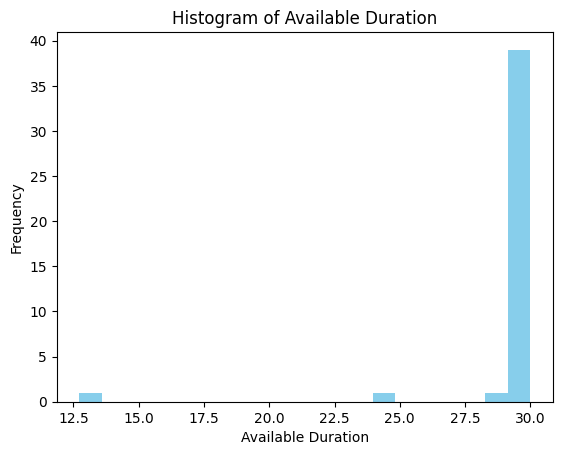

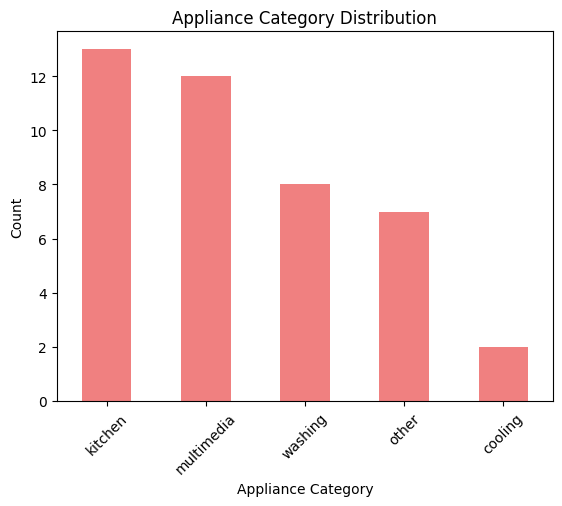

Consumo promedio de energía por categoría de electrodoméstico (ordenado de mayor a menor):
appliance_category
washing       2457.125000
kitchen       1589.653846
other          710.571429
multimedia      71.333333
cooling         64.000000
Name: power_max, dtype: float64


In [2]:
# Abriendo el archvio de datos.
data = pd.read_csv('./archive/0_smart_plugs_devices.csv')

print(data.head())

# Resumen estadístico
print(data.describe())

# Imformación general del dataframe.
print(data.info())


# Histograma de la columna "available_duration"
plt.hist(data["available_duration"], bins=20, color='skyblue')
plt.xlabel("Available Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Available Duration")
plt.show()

# Gráfico de barras de la columna "appliance_category"
data["appliance_category"].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel("Appliance Category")
plt.ylabel("Count")
plt.title("Appliance Category Distribution")
plt.xticks(rotation=45)
plt.show()


# Cálculo del primedio de "power_max" por categoría de electrodoméstico.
avg_power_by_category = data.groupby("appliance_category")["power_max"].mean().sort_values(ascending=False)

print("Consumo promedio de energía por categoría de electrodoméstico (ordenado de mayor a menor):")
print(avg_power_by_category)

### Abriendo el archivo de washing_machine_343.csv

Encabezados del dataframe: 
                   timestamp  power
0  2021-04-04 21:46:29+00:00    1.0
1  2021-04-04 21:46:30+00:00    1.0
2  2021-04-04 21:46:31+00:00    1.0
3  2021-04-04 21:46:32+00:00    1.0
4  2021-04-04 21:46:33+00:00    1.0
Filas y columnas del dataframe: 
(2513611, 2)


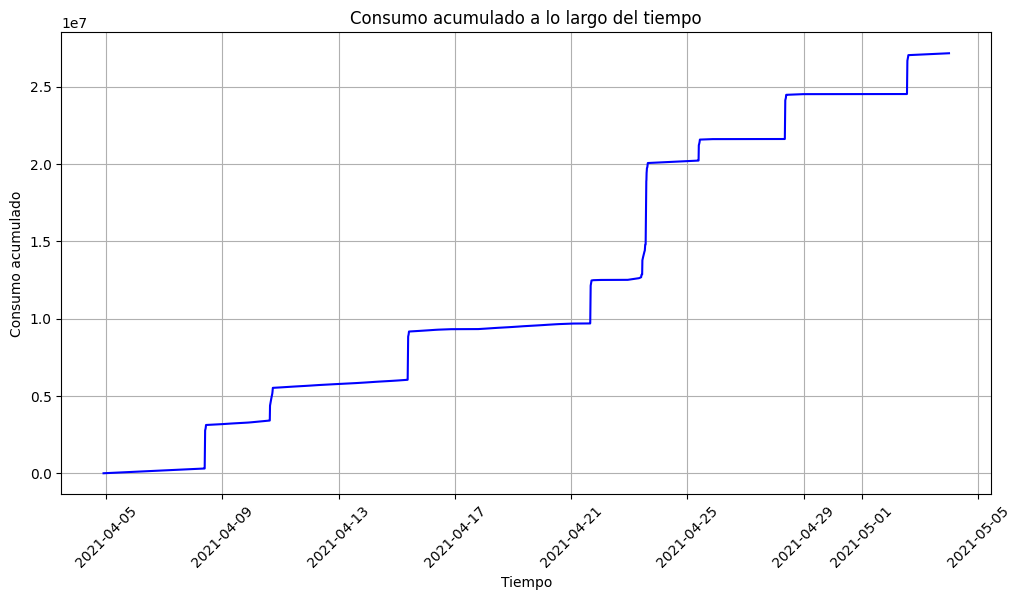

In [3]:
# Cargando el DataFrame desde el archivo CSV
washing_machine_343 = pd.read_csv('./archive/washing_machine_343.csv')

print("Encabezados del dataframe: ")
print(washing_machine_343.head())

# Imprimiendo la cantidad de filas y columnas del dataframe.
print("Filas y columnas del dataframe: ")
print(washing_machine_343.shape)

# Cambiando el formato de la columna "timestamp" a datetime.
washing_machine_343["timestamp"] = pd.to_datetime(washing_machine_343["timestamp"])

# Ordenando el dataframe por la columna "timestamp".
washing_machine_343 = washing_machine_343.sort_values(by="timestamp")

# Eliminando filas con valores NaN (missing values)
washing_machine_343 = washing_machine_343.dropna()

# Guardando el DataFrame limpio en el mismo archivo CSV
washing_machine_343.to_csv('./archive/washing_machine_343.csv', index=False)

# Calculando el consumo acumulado
washing_machine_343['cumulative_power'] = washing_machine_343['power'].cumsum()

# Creando una gráfica del consumo acumulado a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(washing_machine_343['timestamp'], washing_machine_343['cumulative_power'], color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Consumo acumulado')
plt.title('Consumo acumulado a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Abriendo el archivo de internet_router_295.csv.

Encabezados del dataframe: 
                   timestamp  power
0  2021-01-16 07:39:05+00:00   31.0
1  2021-01-16 07:39:06+00:00   31.0
2  2021-01-16 07:39:07+00:00   31.0
3  2021-01-16 07:39:08+00:00   31.0
4  2021-01-16 07:39:09+00:00   31.0
Filas y columnas del dataframe: 
(2592001, 2)


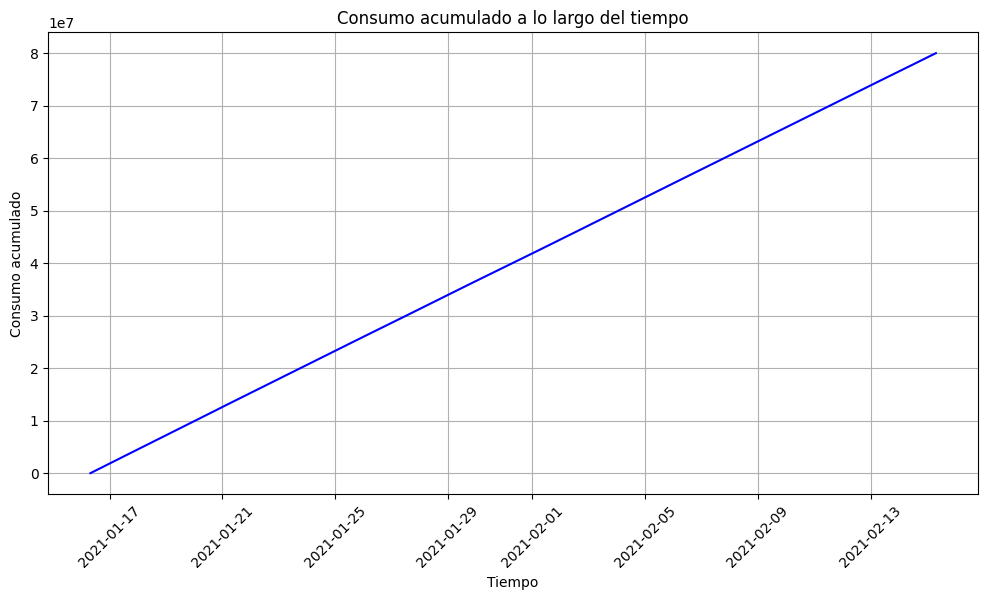

In [4]:
# Cargando el DataFrame desde el archivo CSV
internet_router_295 = pd.read_csv('./archive/internet_router_295.csv')

print("Encabezados del dataframe: ")
print(internet_router_295.head())

# Imprimiendo la cantidad de filas y columnas del dataframe.
print("Filas y columnas del dataframe: ")
print(internet_router_295.shape)

# Cambiando el formato de la columna "timestamp" a datetime.
internet_router_295["timestamp"] = pd.to_datetime(internet_router_295["timestamp"])

# Ordenando el dataframe por la columna "timestamp".
internet_router_295 = internet_router_295.sort_values(by="timestamp")

# Eliminando filas con valores NaN (missing values)
internet_router_295 = internet_router_295.dropna()

# Guardando el DataFrame limpio en el mismo archivo CSV
internet_router_295.to_csv('./archive/internet_router_295.csv', index=False)

# Calculando el consumo acumulado
internet_router_295['cumulative_power'] = internet_router_295['power'].cumsum()

# Creando una gráfica del consumo acumulado a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(internet_router_295['timestamp'], internet_router_295['cumulative_power'], color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Consumo acumulado')
plt.title('Consumo acumulado a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Abriendo el archivo vacuum_254.csv.

Encabezados del dataframe: 
                   timestamp  power
0  2021-01-17 06:20:03+00:00    3.0
1  2021-01-17 06:20:04+00:00    3.0
2  2021-01-17 06:20:05+00:00    3.0
3  2021-01-17 06:20:06+00:00    3.0
4  2021-01-17 06:20:07+00:00    3.0
Filas y columnas del dataframe: 
(2592001, 2)


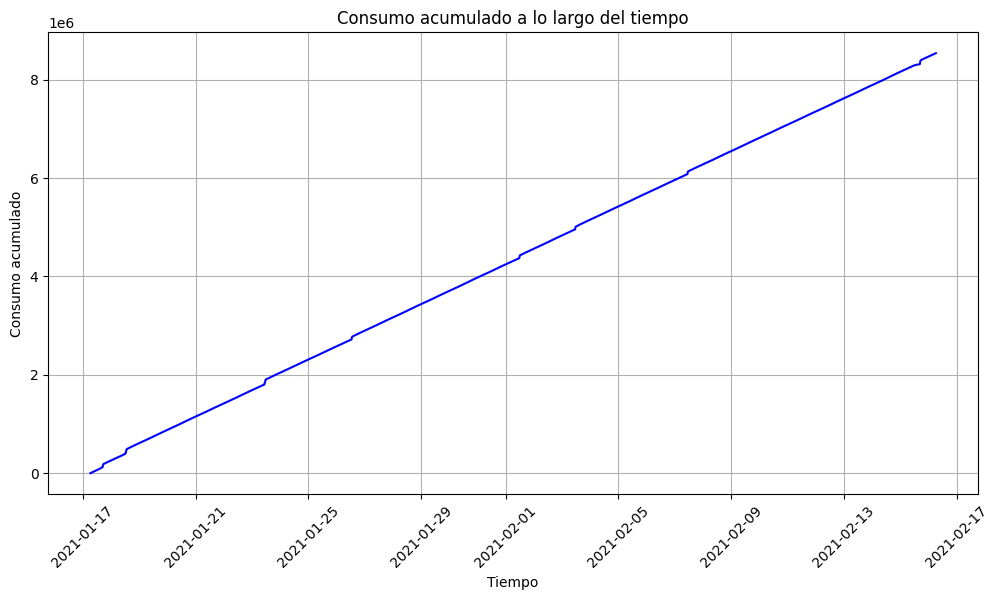

In [5]:
# Cargando el DataFrame desde el archivo CSV
vacuum_254 = pd.read_csv('./archive/vacuum_254.csv')

print("Encabezados del dataframe: ")
print(vacuum_254.head())

# Imprimiendo la cantidad de filas y columnas del dataframe.
print("Filas y columnas del dataframe: ")
print(vacuum_254.shape)

# Cambiando el formato de la columna "timestamp" a datetime.
vacuum_254["timestamp"] = pd.to_datetime(vacuum_254["timestamp"])

# Ordenando el dataframe por la columna "timestamp".
vacuum_254 = vacuum_254.sort_values(by="timestamp")

# Eliminando filas con valores NaN (missing values)
vacuum_254 = vacuum_254.dropna()

# Guardando el DataFrame limpio en el mismo archivo CSV
vacuum_254.to_csv('./archive/internet_router_295.csv', index=False)

# Calculando el consumo acumulado
vacuum_254['cumulative_power'] = vacuum_254['power'].cumsum()

# Creando una gráfica del consumo acumulado a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(vacuum_254['timestamp'], vacuum_254['cumulative_power'], color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Consumo acumulado')
plt.title('Consumo acumulado a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Abriendo el archivo washing_machine_32.

Encabezados del dataframe: 
                   timestamp  power
0  2021-01-18 11:13:03+00:00    0.0
1  2021-01-18 11:13:04+00:00    0.0
2  2021-01-18 11:13:05+00:00    0.0
3  2021-01-18 11:13:06+00:00    0.0
4  2021-01-18 11:13:07+00:00    0.0
Filas y columnas del dataframe: 
(2592000, 2)


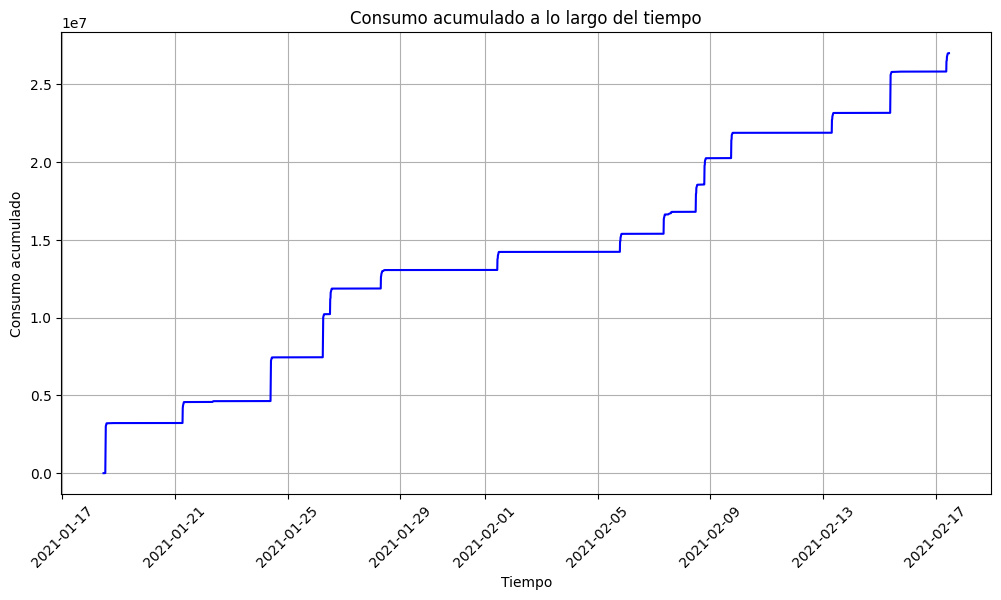

In [6]:
# Cargando el DataFrame desde el archivo CSV
washing_machine_32 = pd.read_csv('./archive/washing_machine_32.csv')

print("Encabezados del dataframe: ")
print(washing_machine_32.head())

# Imprimiendo la cantidad de filas y columnas del dataframe.
print("Filas y columnas del dataframe: ")
print(washing_machine_32.shape)

# Cambiando el formato de la columna "timestamp" a datetime.
washing_machine_32["timestamp"] = pd.to_datetime(washing_machine_32["timestamp"])

# Ordenando el dataframe por la columna "timestamp".
washing_machine_32 = washing_machine_32.sort_values(by="timestamp")

# Eliminando filas con valores NaN (missing values)
washing_machine_32 = washing_machine_32.dropna()

# Guardando el DataFrame limpio en el mismo archivo CSV
washing_machine_32.to_csv('./archive/internet_router_295.csv', index=False)

# Calculando el consumo acumulado
washing_machine_32['cumulative_power'] = washing_machine_32['power'].cumsum()

# Creando una gráfica del consumo acumulado a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(washing_machine_32['timestamp'], washing_machine_32['cumulative_power'], color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Consumo acumulado')
plt.title('Consumo acumulado a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Abriendo los demás archivos.

Encabezados del dataframe para dishwasher_53.csv:
                   timestamp  power
0  2021-01-18 00:51:25+00:00    2.0
1  2021-01-18 00:51:26+00:00    2.0
2  2021-01-18 00:51:27+00:00    2.0
3  2021-01-18 00:51:28+00:00    2.0
4  2021-01-18 00:51:29+00:00    2.0
Filas y columnas del dataframe para dishwasher_53.csv:
(2592001, 2)


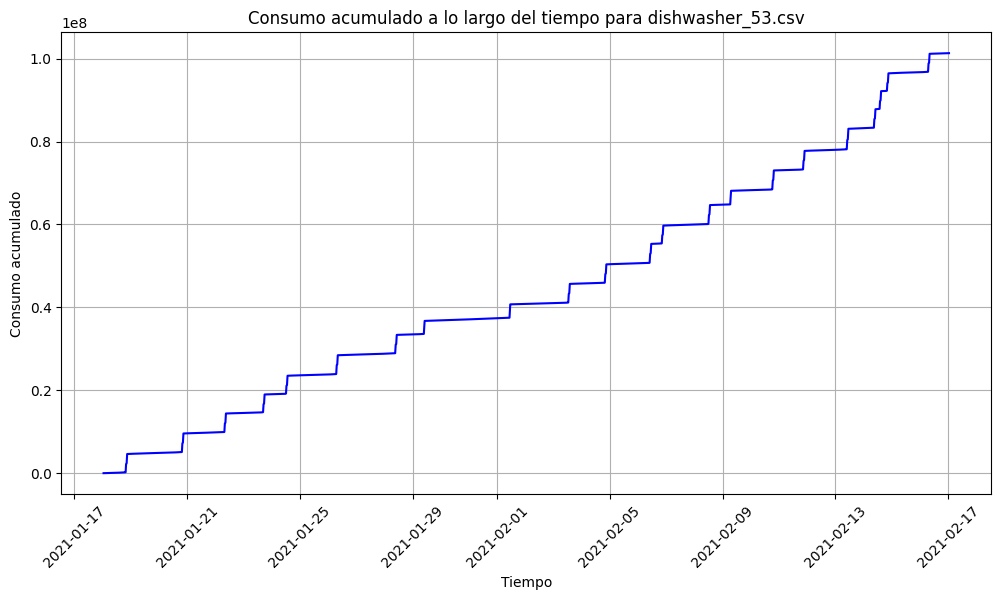

Encabezados del dataframe para boiler_226.csv:
                   timestamp  power
0  2021-02-18 05:28:53+00:00    1.0
1  2021-02-18 05:28:54+00:00    1.0
2  2021-02-18 05:28:55+00:00    1.0
3  2021-02-18 05:28:56+00:00    1.0
4  2021-02-18 05:28:57+00:00    1.0
Filas y columnas del dataframe para boiler_226.csv:
(2592000, 2)


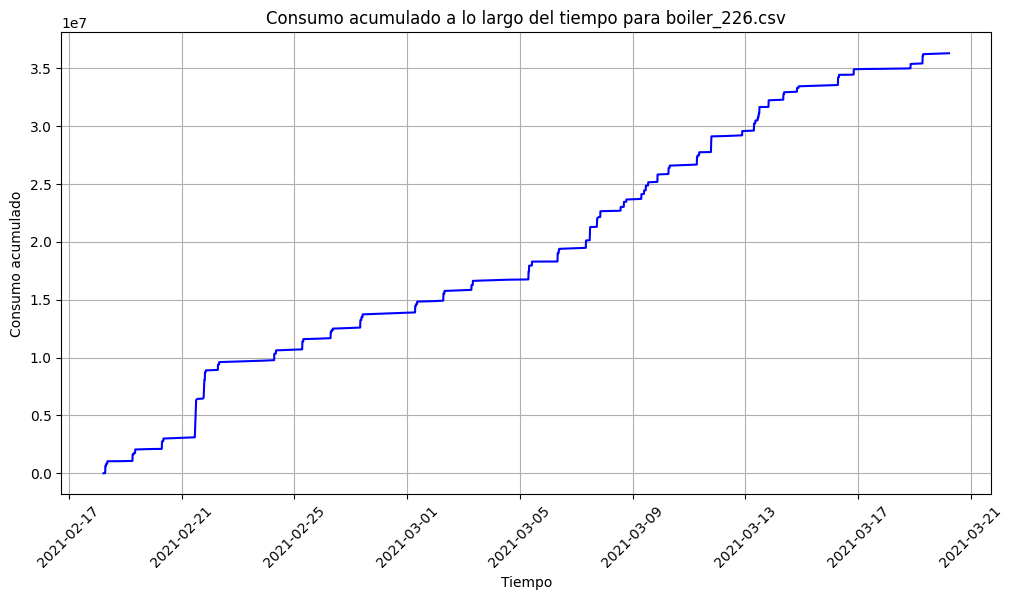

Encabezados del dataframe para air_purifier_293.csv:
                   timestamp  power
0  2021-01-14 01:44:52+00:00    1.0
1  2021-01-14 01:44:53+00:00    1.0
2  2021-01-14 01:44:54+00:00    1.0
3  2021-01-14 01:44:55+00:00    1.0
4  2021-01-14 01:44:56+00:00    1.0
Filas y columnas del dataframe para air_purifier_293.csv:
(2592001, 2)


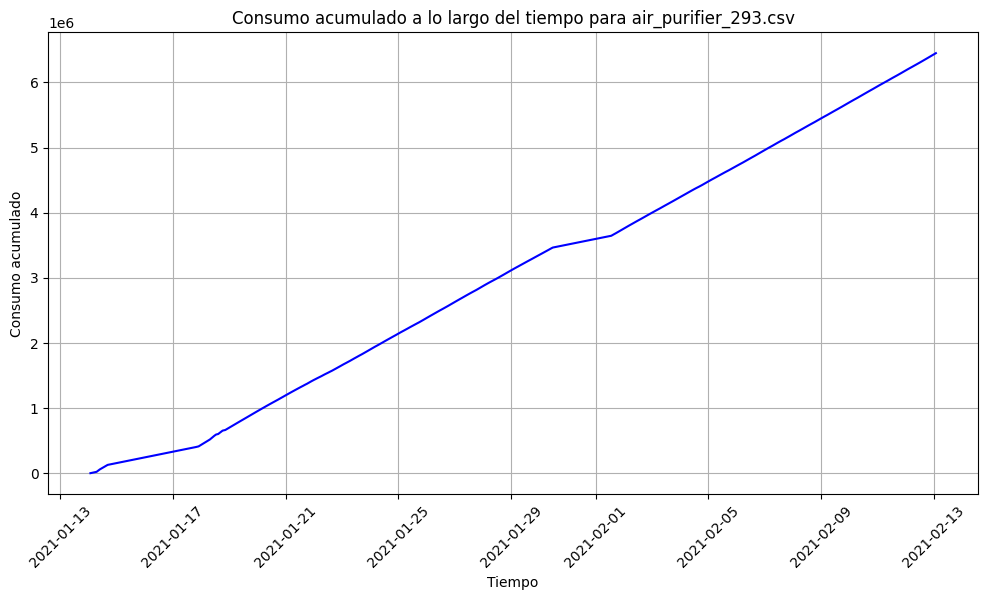

Encabezados del dataframe para sound_system_252.csv:
                   timestamp  power
0  2020-10-24 09:39:43+00:00   12.0
1  2020-10-24 09:39:44+00:00   12.0
2  2020-10-24 09:39:45+00:00   12.0
3  2020-10-24 09:39:46+00:00   12.0
4  2020-10-24 09:39:47+00:00   12.0
Filas y columnas del dataframe para sound_system_252.csv:
(2592000, 2)


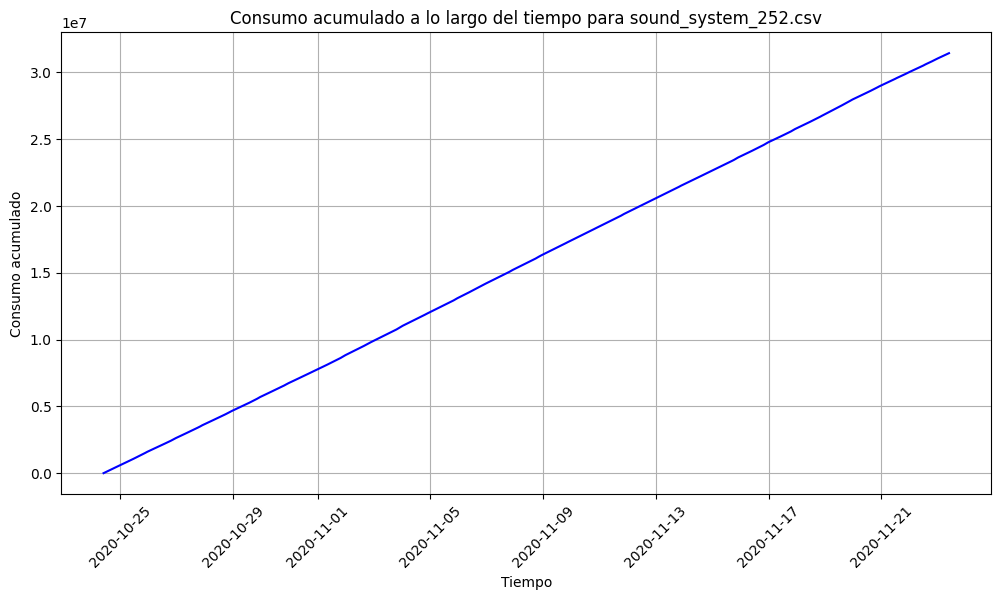

Encabezados del dataframe para 3D_printer_29.csv:
                   timestamp  power
0  2020-09-25 00:00:00+00:00    0.0
1  2020-09-25 00:00:01+00:00    0.0
2  2020-09-25 00:00:02+00:00    0.0
3  2020-09-25 00:00:03+00:00    0.0
4  2020-09-25 00:00:04+00:00    0.0
Filas y columnas del dataframe para 3D_printer_29.csv:
(2591999, 2)


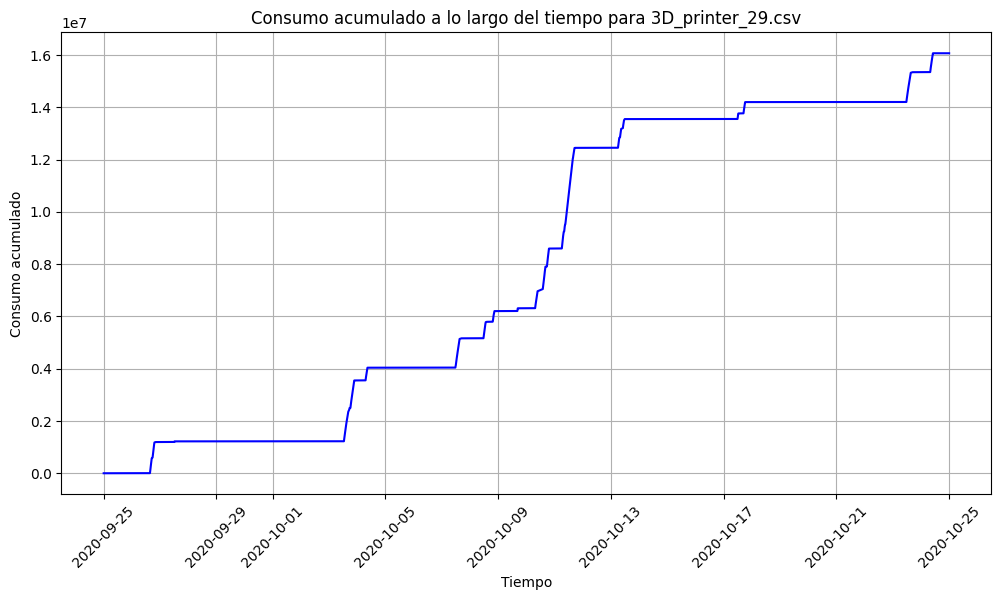

Encabezados del dataframe para coffee_54.csv:
                   timestamp  power
0  2020-12-13 12:51:57+00:00    0.0
1  2020-12-13 12:51:58+00:00    0.0
2  2020-12-13 12:51:59+00:00    0.0
3  2020-12-13 12:52:00+00:00    0.0
4  2020-12-13 12:52:01+00:00    0.0
Filas y columnas del dataframe para coffee_54.csv:
(2592001, 2)


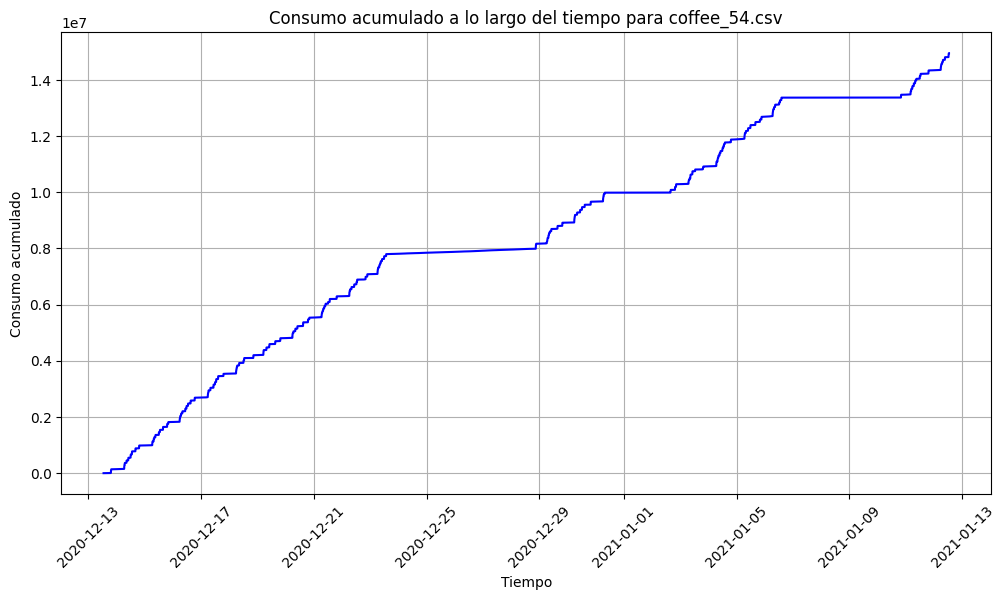

Encabezados del dataframe para phone_charger_282.csv:
                   timestamp  power
0  2021-04-03 21:05:08+00:00    2.0
1  2021-04-03 21:05:09+00:00    2.0
2  2021-04-03 21:05:10+00:00    2.0
3  2021-04-03 21:05:11+00:00    2.0
4  2021-04-03 21:05:12+00:00    2.0
Filas y columnas del dataframe para phone_charger_282.csv:
(2592000, 2)


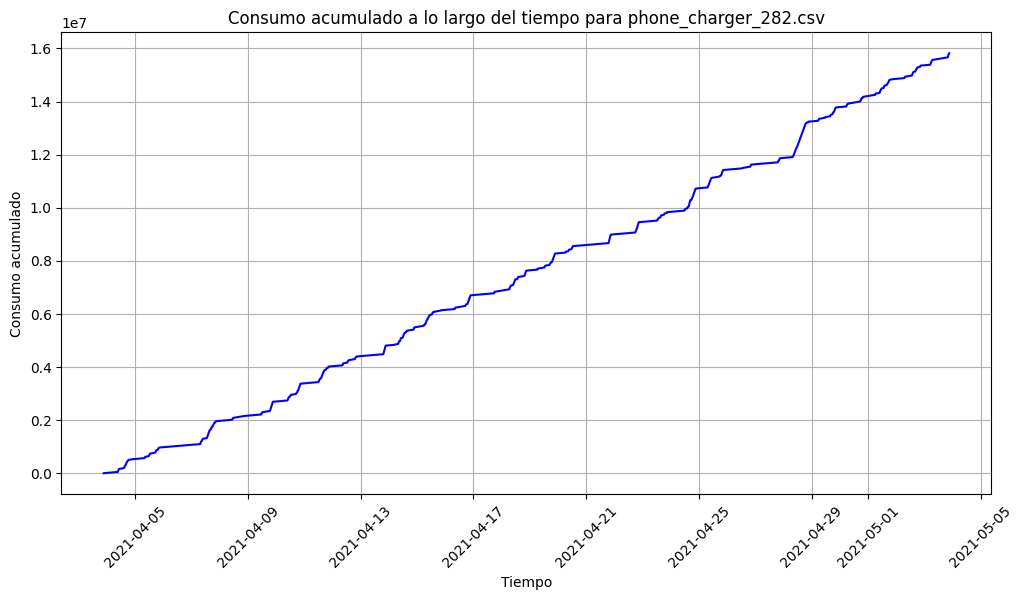

Encabezados del dataframe para fridge_207.csv:
                   timestamp  power
0  2020-12-23 16:42:05+00:00    0.0
1  2020-12-23 16:42:06+00:00    0.0
2  2020-12-23 16:42:07+00:00    0.0
3  2020-12-23 16:42:08+00:00    0.0
4  2020-12-23 16:42:09+00:00    0.0
Filas y columnas del dataframe para fridge_207.csv:
(2592001, 2)


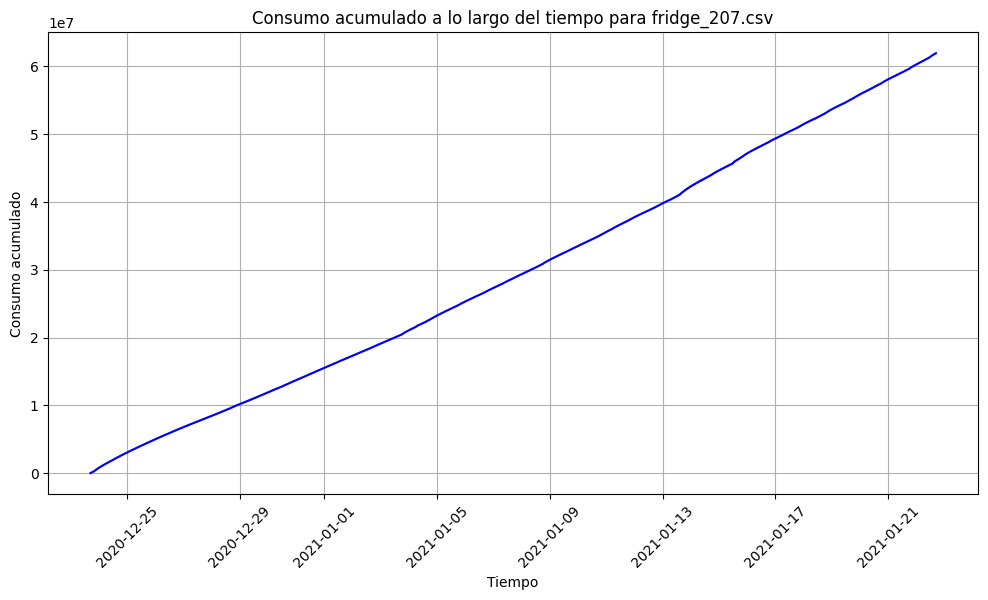

Encabezados del dataframe para radiator_309.csv:
                   timestamp  power
0  2020-12-23 16:42:05+00:00    1.0
1  2020-12-23 16:42:06+00:00    1.0
2  2020-12-23 16:42:07+00:00    1.0
3  2020-12-23 16:42:08+00:00    2.5
4  2020-12-23 16:42:09+00:00    3.0
Filas y columnas del dataframe para radiator_309.csv:
(2592001, 2)


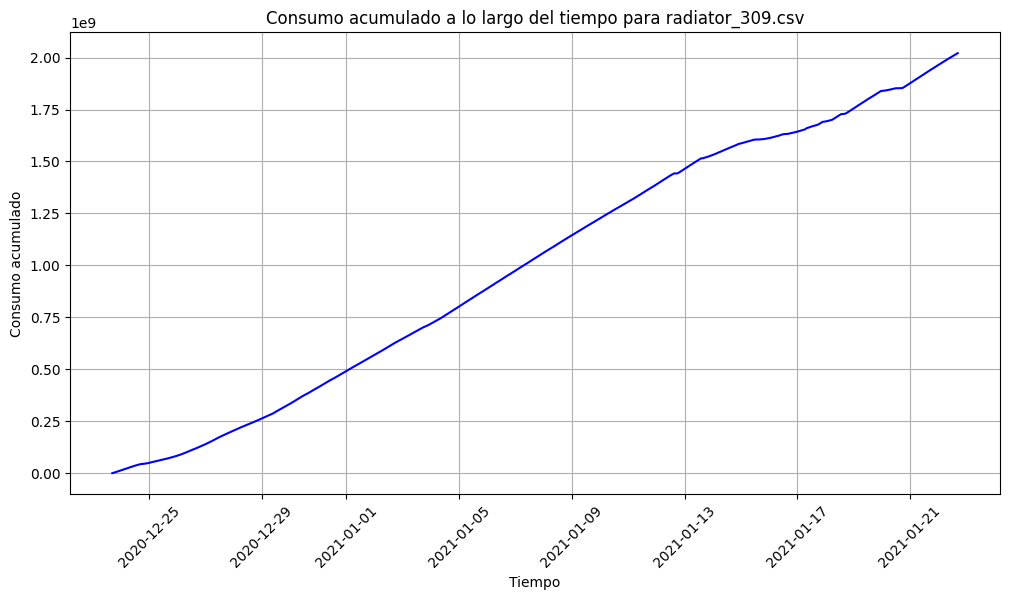

Encabezados del dataframe para dehumidifier_310.csv:
                   timestamp  power
0  2020-12-13 12:51:58+00:00  349.0
1  2020-12-13 12:51:59+00:00  353.0
2  2020-12-13 12:52:00+00:00  349.0
3  2020-12-13 12:52:01+00:00  349.0
4  2020-12-13 12:52:02+00:00  349.0
Filas y columnas del dataframe para dehumidifier_310.csv:
(2592000, 2)


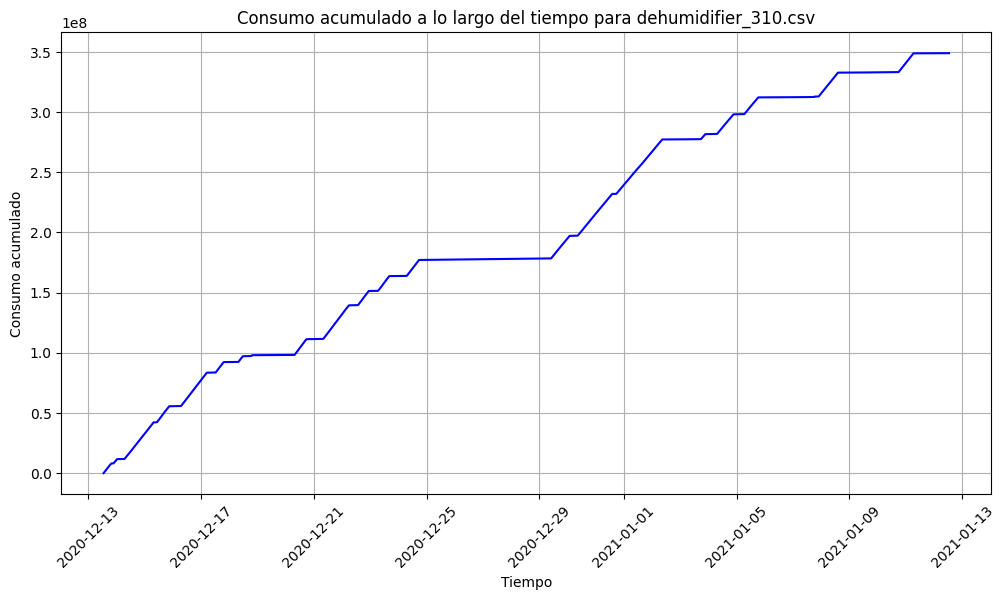

Encabezados del dataframe para fridge_317.csv:
                   timestamp  power
0  2021-01-20 00:00:00+00:00    0.0
1  2021-01-20 00:00:01+00:00    0.0
2  2021-01-20 00:00:02+00:00    0.0
3  2021-01-20 00:00:03+00:00    0.0
4  2021-01-20 00:00:04+00:00    0.0
Filas y columnas del dataframe para fridge_317.csv:
(2592000, 2)


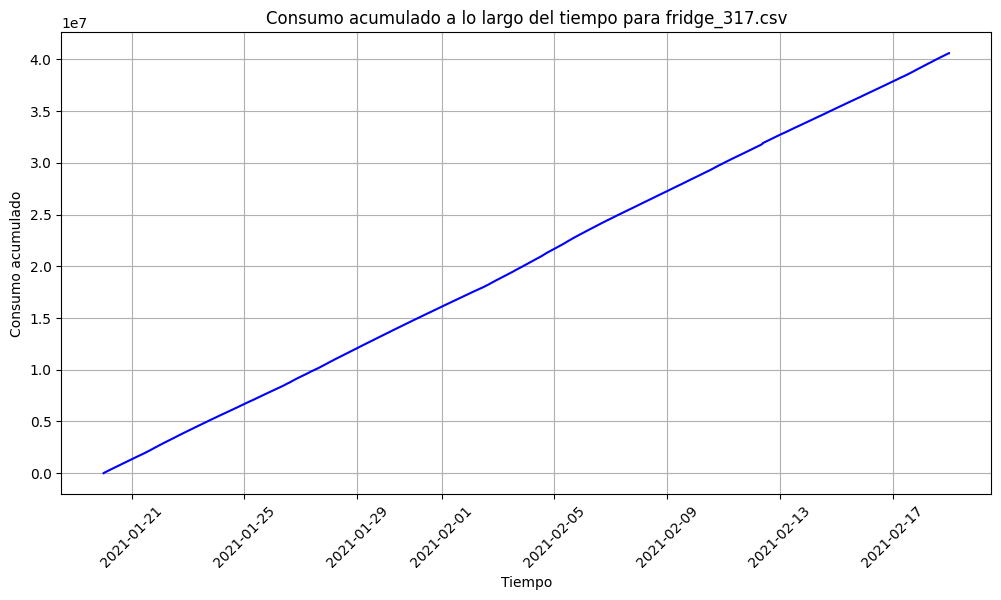

Encabezados del dataframe para micro_wave_oven_314.csv:
                   timestamp  power
0  2021-02-03 15:19:26+00:00    0.0
1  2021-02-03 15:19:27+00:00    0.0
2  2021-02-03 15:19:28+00:00    0.0
3  2021-02-03 15:19:29+00:00    0.0
4  2021-02-03 15:19:30+00:00    0.0
Filas y columnas del dataframe para micro_wave_oven_314.csv:
(2592001, 2)


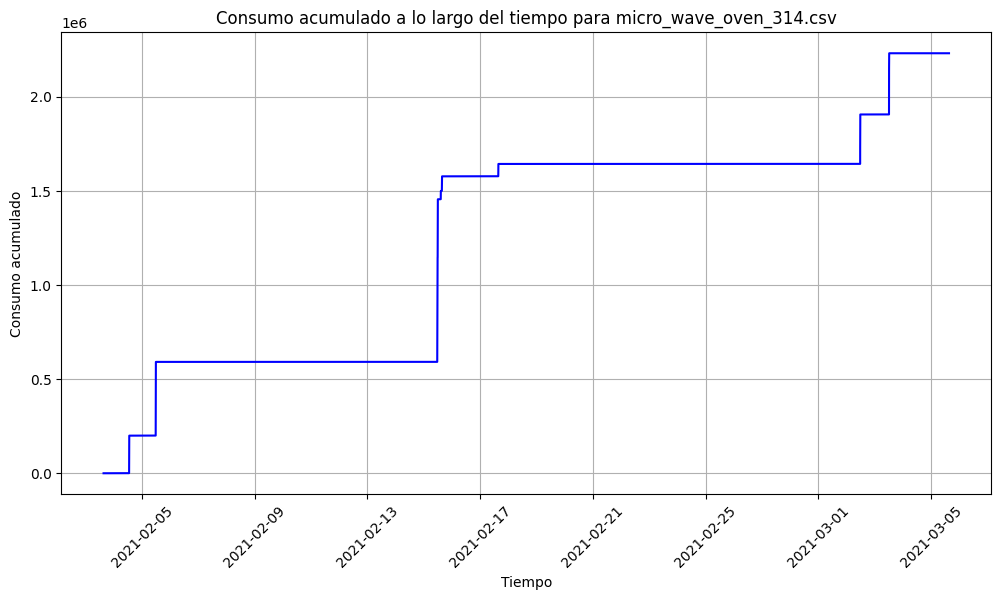

Encabezados del dataframe para laptop_289.csv:
                   timestamp  power
0  2021-01-30 06:02:24+00:00    1.0
1  2021-01-30 06:02:25+00:00    1.0
2  2021-01-30 06:02:26+00:00    1.0
3  2021-01-30 06:02:27+00:00    1.0
4  2021-01-30 06:02:28+00:00    1.0
Filas y columnas del dataframe para laptop_289.csv:
(2592001, 2)


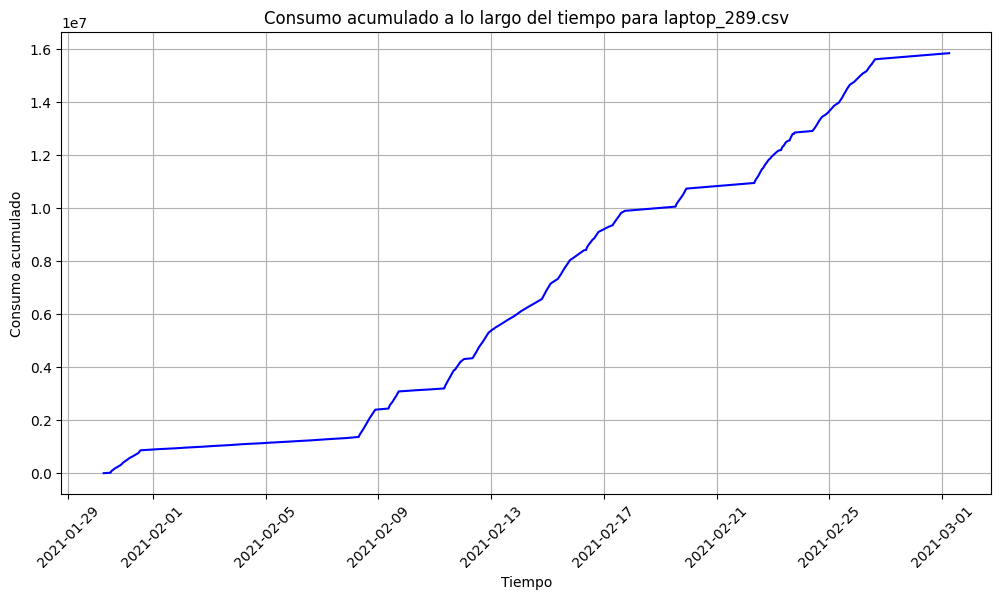

Encabezados del dataframe para tv_290.csv:
                   timestamp  power
0  2021-02-11 18:38:39+00:00    1.0
1  2021-02-11 18:38:40+00:00    1.0
2  2021-02-11 18:38:41+00:00    1.0
3  2021-02-11 18:38:42+00:00    1.0
4  2021-02-11 18:38:43+00:00    1.0
Filas y columnas del dataframe para tv_290.csv:
(2592000, 2)


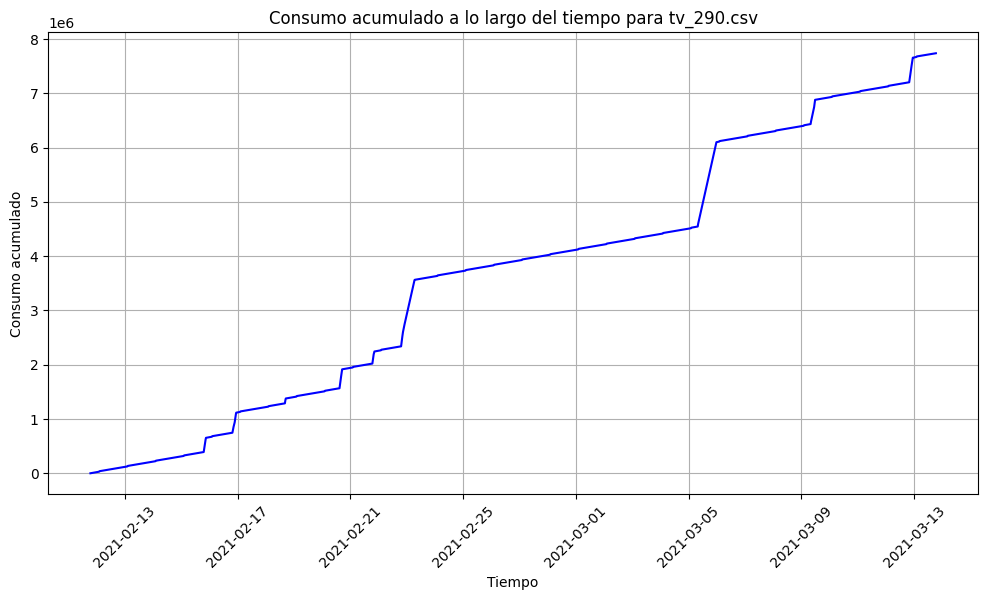

Encabezados del dataframe para vacuum_236.csv:
                   timestamp  power
0  2020-12-11 10:11:44+00:00    0.0
1  2020-12-11 10:11:45+00:00    0.0
2  2020-12-11 10:11:46+00:00    0.0
3  2020-12-11 10:11:47+00:00    0.0
4  2020-12-11 10:11:48+00:00    0.0
Filas y columnas del dataframe para vacuum_236.csv:
(2100000, 2)


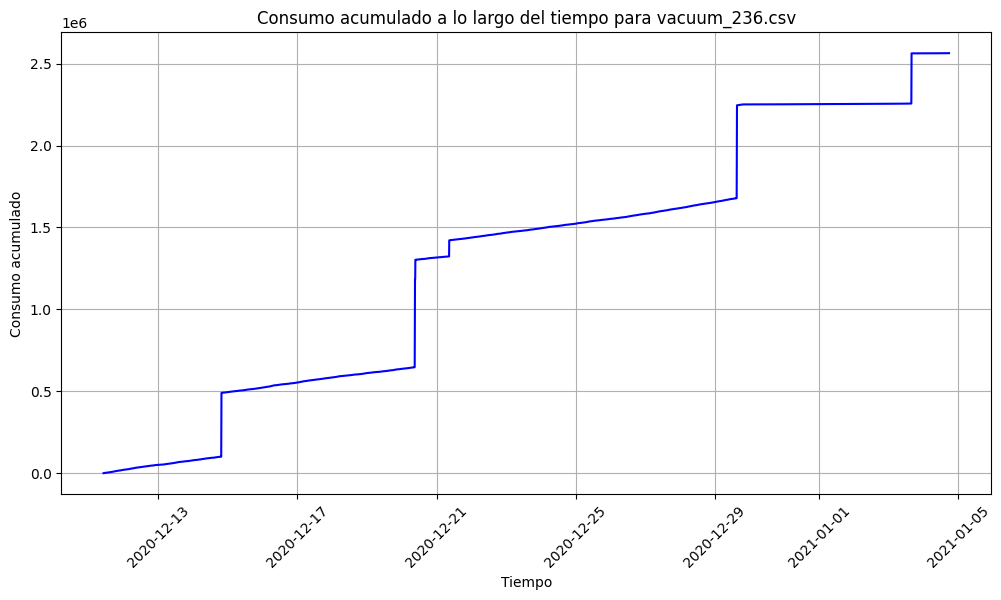

Encabezados del dataframe para screen_302.csv:
                   timestamp  power
0  2021-01-11 17:00:26+00:00   29.5
1  2021-01-11 17:00:27+00:00   30.0
2  2021-01-11 17:00:28+00:00   29.0
3  2021-01-11 17:00:29+00:00   29.0
4  2021-01-11 17:00:30+00:00   29.0
Filas y columnas del dataframe para screen_302.csv:
(1100000, 2)


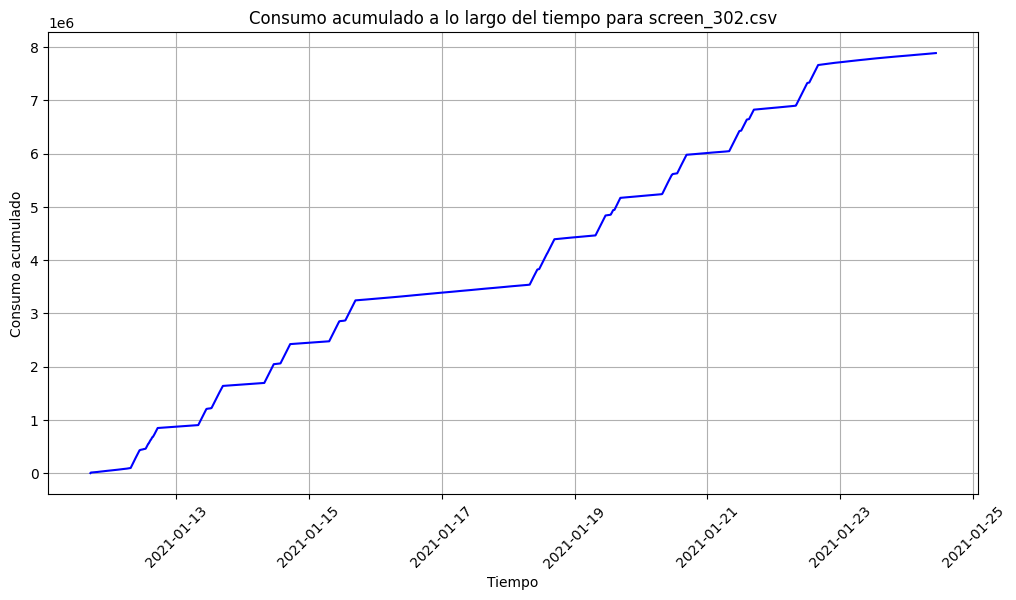

Encabezados del dataframe para dehumidifier_322.csv:
                   timestamp  power
0  2021-03-10 01:37:21+00:00    0.0
1  2021-03-10 01:37:22+00:00    0.0
2  2021-03-10 01:37:23+00:00    0.0
3  2021-03-10 01:37:24+00:00    0.0
4  2021-03-10 01:37:25+00:00    0.0
Filas y columnas del dataframe para dehumidifier_322.csv:
(2592001, 2)


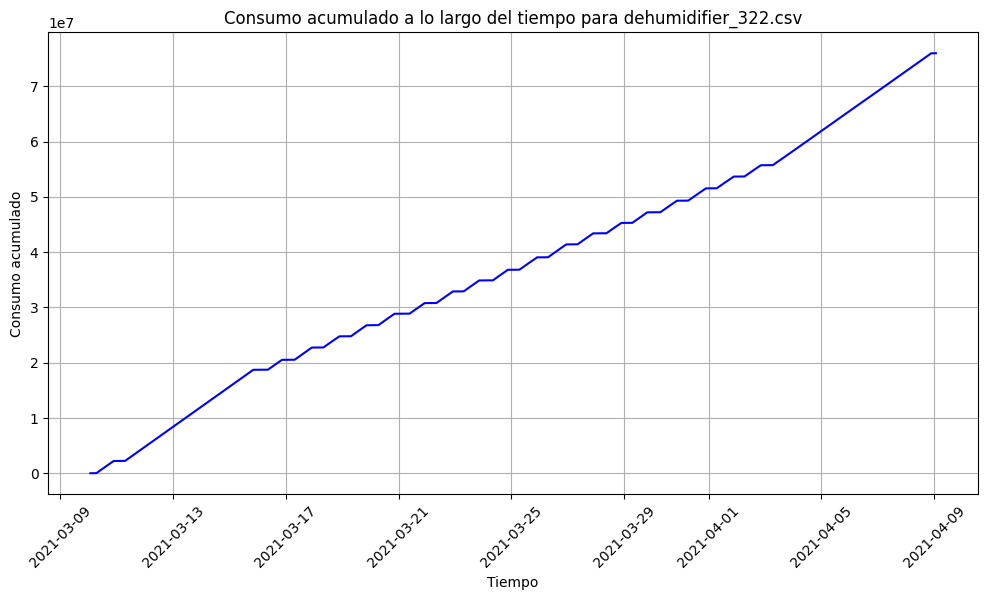

Encabezados del dataframe para solar_panel_325.csv:
                   timestamp  power
0  2021-04-20 10:08:23+00:00   24.0
1  2021-04-20 10:08:24+00:00   24.0
2  2021-04-20 10:08:25+00:00   24.0
3  2021-04-20 10:08:26+00:00   24.0
4  2021-04-20 10:08:27+00:00   24.0
Filas y columnas del dataframe para solar_panel_325.csv:
(2592001, 2)


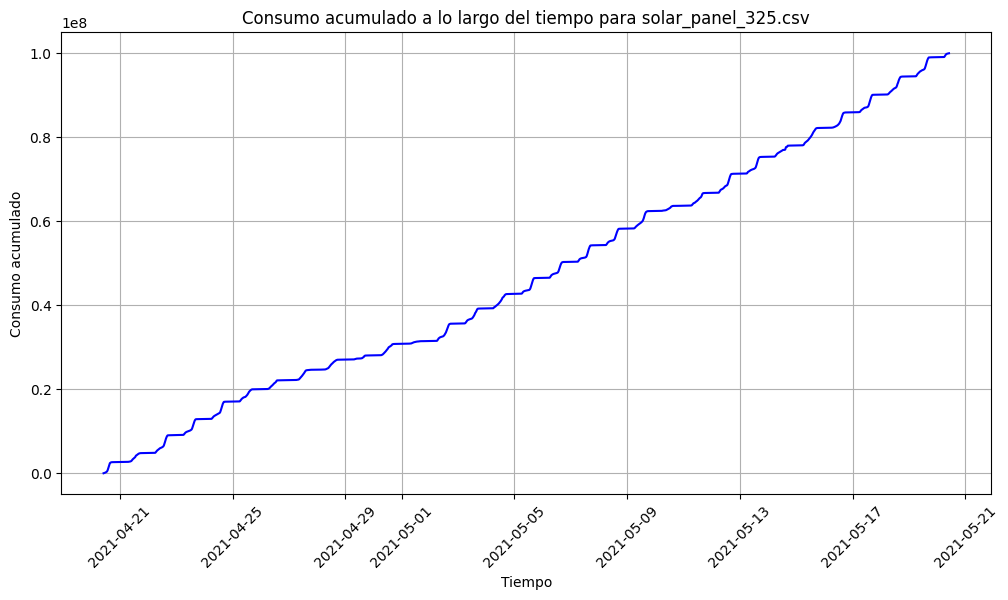

Encabezados del dataframe para screen_146.csv:
                   timestamp  power
0  2020-07-17 02:14:56+00:00    1.0
1  2020-07-17 02:14:57+00:00    1.0
2  2020-07-17 02:14:58+00:00    1.0
3  2020-07-17 02:14:59+00:00    1.0
4  2020-07-17 02:15:00+00:00    1.0
Filas y columnas del dataframe para screen_146.csv:
(2592001, 2)


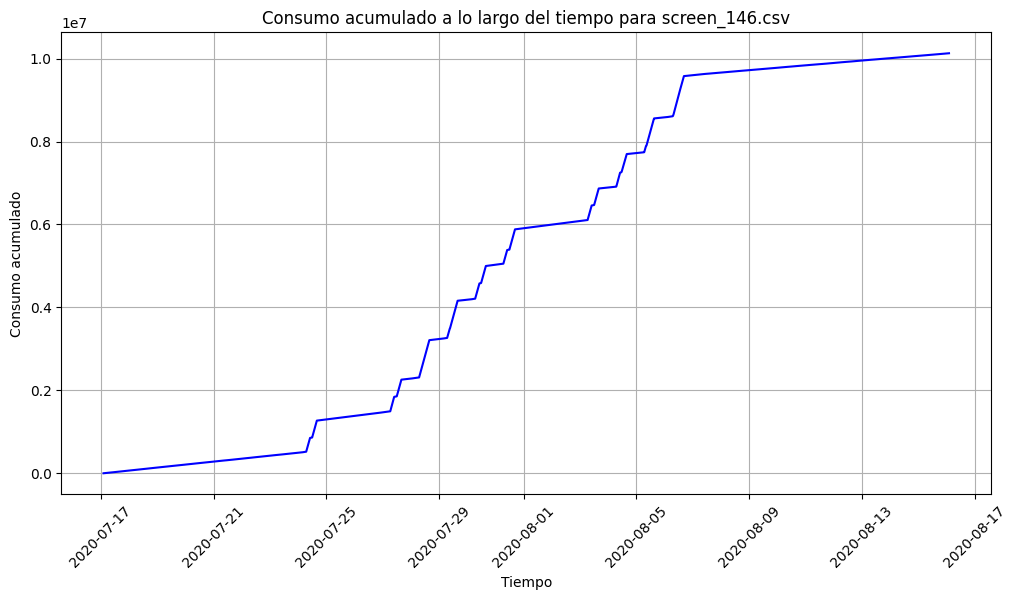

Encabezados del dataframe para washing_machine_157.csv:
                   timestamp  power
0  2021-03-10 02:30:34+00:00    1.0
1  2021-03-10 02:30:35+00:00    1.0
2  2021-03-10 02:30:36+00:00    1.0
3  2021-03-10 02:30:37+00:00    1.0
4  2021-03-10 02:30:38+00:00    1.0
Filas y columnas del dataframe para washing_machine_157.csv:
(2592001, 2)


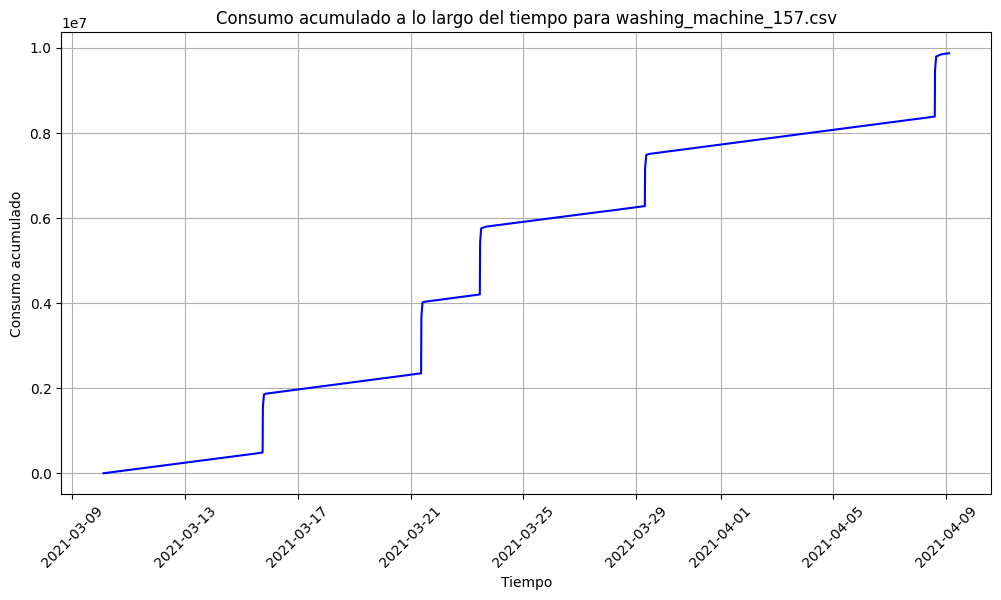

Encabezados del dataframe para fan_215.csv:
                   timestamp  power
0  2020-07-16 18:53:28+00:00    1.0
1  2020-07-16 18:53:29+00:00    1.0
2  2020-07-16 18:53:30+00:00    1.0
3  2020-07-16 18:53:31+00:00    1.0
4  2020-07-16 18:53:32+00:00    1.0
Filas y columnas del dataframe para fan_215.csv:
(2592001, 2)


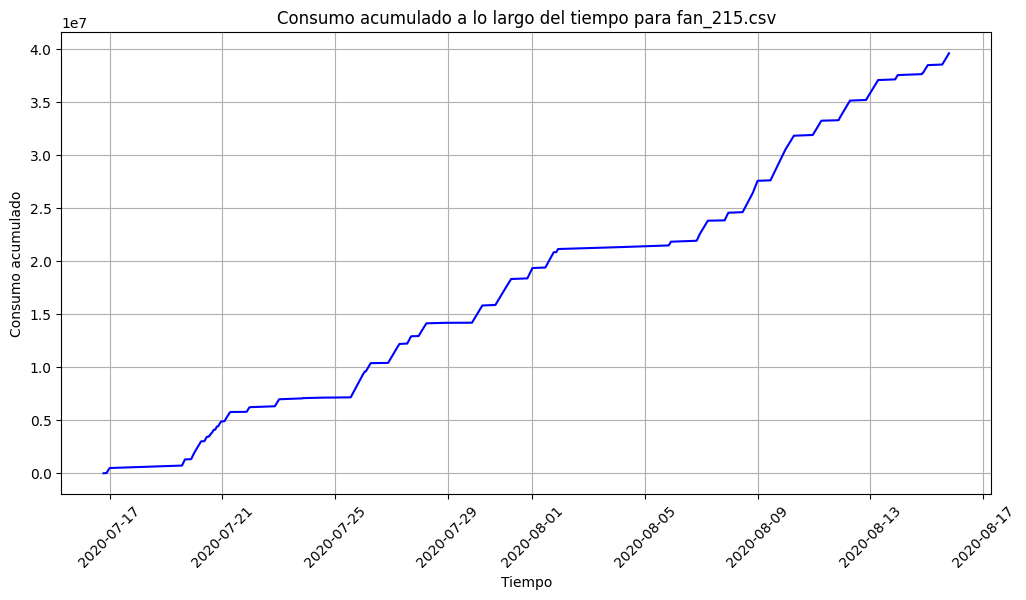

Encabezados del dataframe para air_conditioner_222.csv:
                   timestamp  power
0  2020-10-21 12:57:47+00:00    0.0
1  2020-10-21 12:57:48+00:00    0.0
2  2020-10-21 12:57:49+00:00    0.0
3  2020-10-21 12:57:50+00:00    0.0
4  2020-10-21 12:57:51+00:00    0.0
Filas y columnas del dataframe para air_conditioner_222.csv:
(2592001, 2)


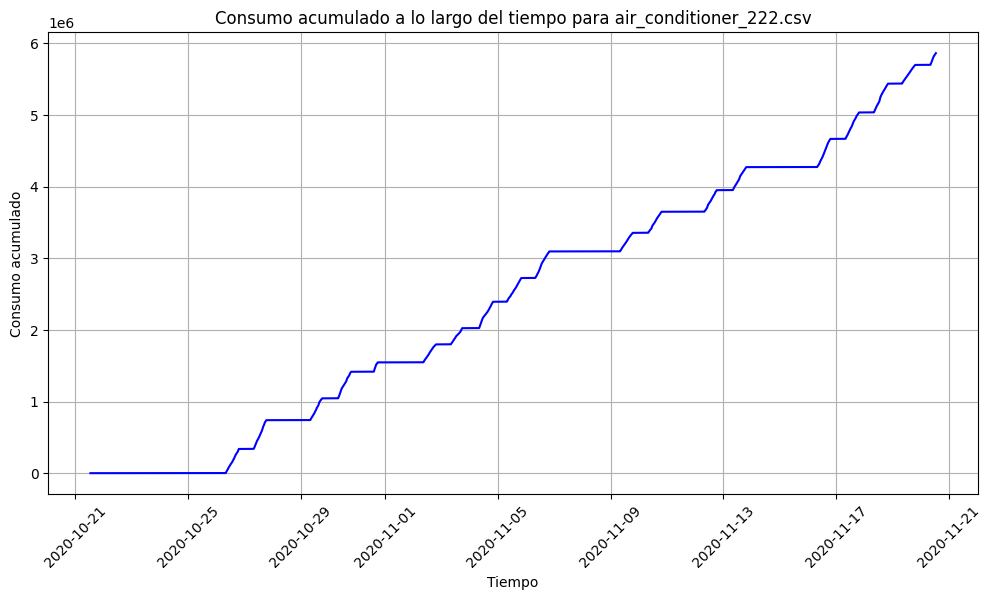

Encabezados del dataframe para laptop_64.csv:
                   timestamp  power
0  2020-06-16 13:20:08+00:00    0.0
1  2020-06-16 13:20:09+00:00    0.0
2  2020-06-16 13:20:10+00:00    0.0
3  2020-06-16 13:20:11+00:00    0.0
4  2020-06-16 13:20:12+00:00    0.0
Filas y columnas del dataframe para laptop_64.csv:
(2543992, 2)


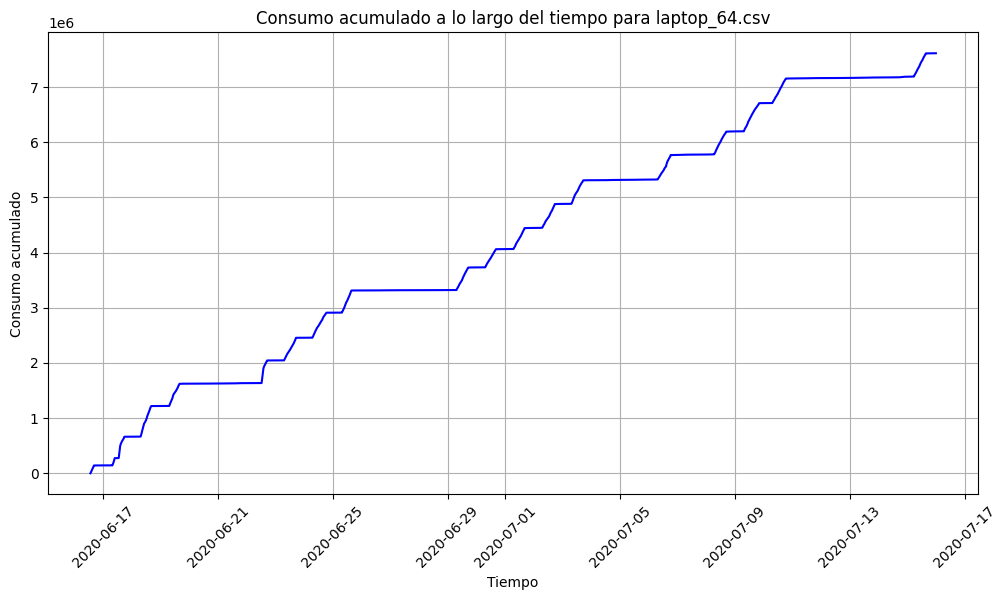

Encabezados del dataframe para coffee_37.csv:
                   timestamp  power
0  2020-12-01 18:10:11+00:00    0.0
1  2020-12-01 18:10:12+00:00    0.0
2  2020-12-01 18:10:13+00:00    0.0
3  2020-12-01 18:10:14+00:00    0.0
4  2020-12-01 18:10:15+00:00    0.0
Filas y columnas del dataframe para coffee_37.csv:
(2592001, 2)


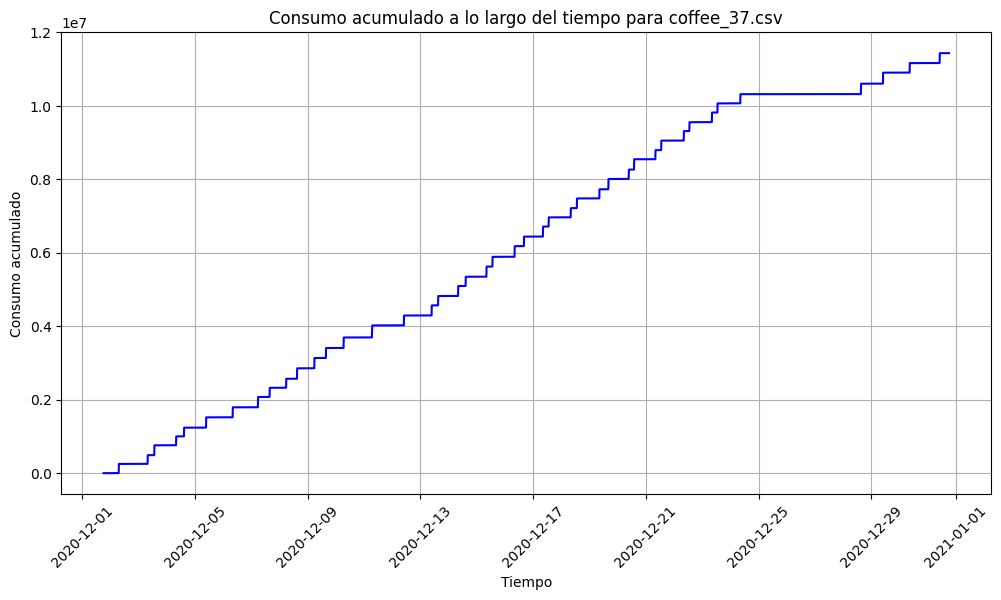

Encabezados del dataframe para washing_machine_52.csv:
                   timestamp  power
0  2020-06-15 15:30:59+00:00    0.0
1  2020-06-15 15:31:00+00:00    0.0
2  2020-06-15 15:31:01+00:00    0.0
3  2020-06-15 15:31:02+00:00    0.0
4  2020-06-15 15:31:03+00:00    0.0
Filas y columnas del dataframe para washing_machine_52.csv:
(2536141, 2)


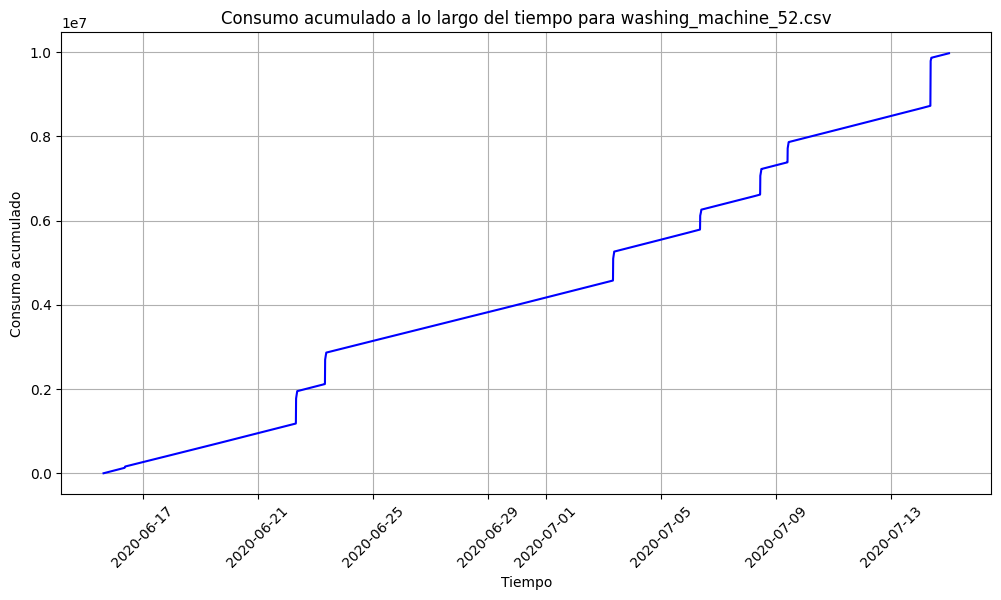

Encabezados del dataframe para computer_44.csv:
                   timestamp  power
0  2020-12-01 06:54:44+00:00    3.0
1  2020-12-01 06:54:45+00:00    3.0
2  2020-12-01 06:54:46+00:00    3.0
3  2020-12-01 06:54:47+00:00    3.0
4  2020-12-01 06:54:48+00:00    3.0
Filas y columnas del dataframe para computer_44.csv:
(2592001, 2)


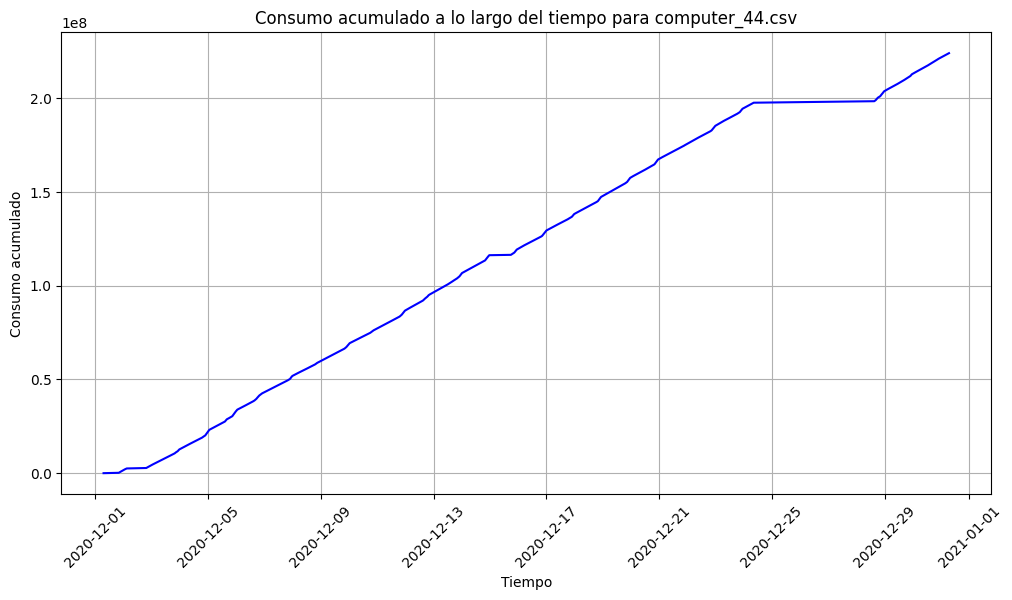

Encabezados del dataframe para boiler_233.csv:
                   timestamp  power
0  2020-12-06 18:10:48+00:00    0.0
1  2020-12-06 18:10:49+00:00    0.0
2  2020-12-06 18:10:50+00:00    0.0
3  2020-12-06 18:10:51+00:00    0.0
4  2020-12-06 18:10:52+00:00    0.0
Filas y columnas del dataframe para boiler_233.csv:
(2592001, 2)


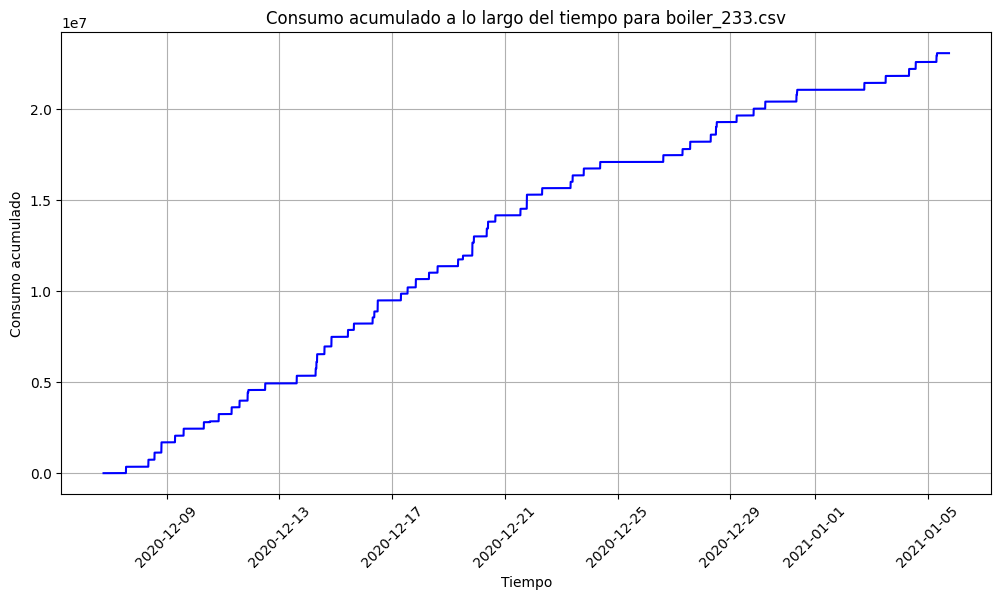

Encabezados del dataframe para micro_wave_oven_147.csv:
                   timestamp  power
0  2021-02-15 14:26:18+00:00    1.0
1  2021-02-15 14:26:19+00:00    1.0
2  2021-02-15 14:26:20+00:00    1.0
3  2021-02-15 14:26:21+00:00    1.0
4  2021-02-15 14:26:22+00:00    1.0
Filas y columnas del dataframe para micro_wave_oven_147.csv:
(2592001, 2)


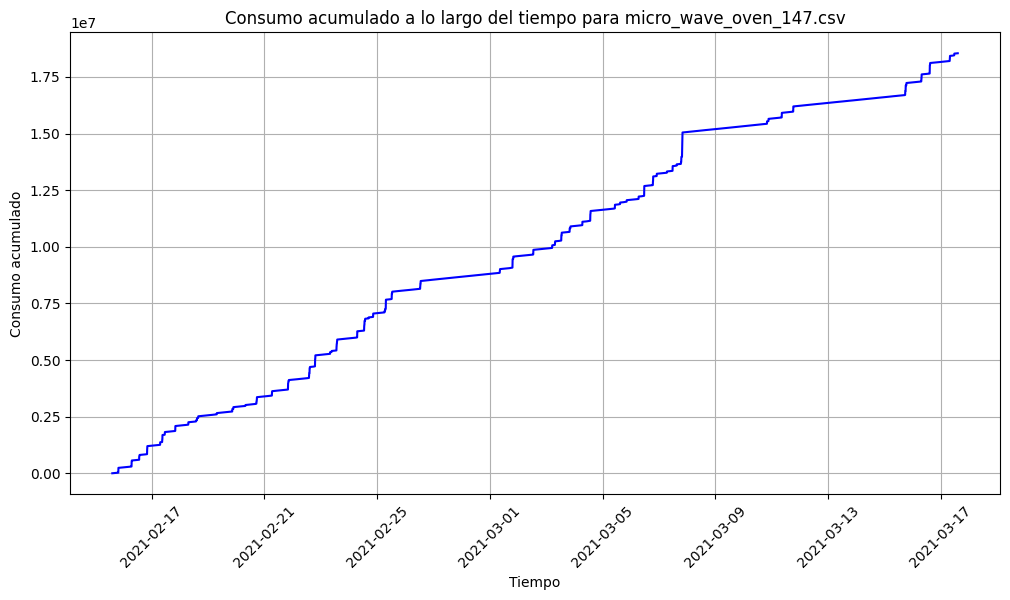

Encabezados del dataframe para printer_286.csv:
                   timestamp  power
0  2020-11-25 00:00:00+00:00    5.0
1  2020-11-25 00:00:01+00:00    5.0
2  2020-11-25 00:00:02+00:00    5.0
3  2020-11-25 00:00:03+00:00    5.0
4  2020-11-25 00:00:04+00:00    2.0
Filas y columnas del dataframe para printer_286.csv:
(2592000, 2)


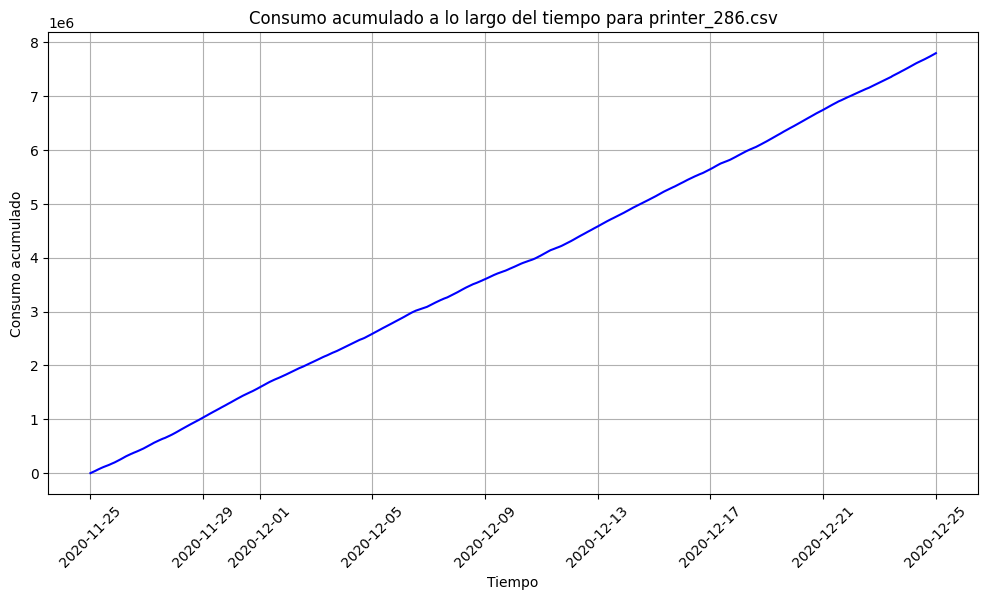

Encabezados del dataframe para fridge_284.csv:
                   timestamp  power
0  2020-12-04 00:32:37+00:00   44.0
1  2020-12-04 00:32:38+00:00   44.0
2  2020-12-04 00:32:39+00:00   44.0
3  2020-12-04 00:32:40+00:00   44.0
4  2020-12-04 00:32:41+00:00   44.0
Filas y columnas del dataframe para fridge_284.csv:
(2592000, 2)


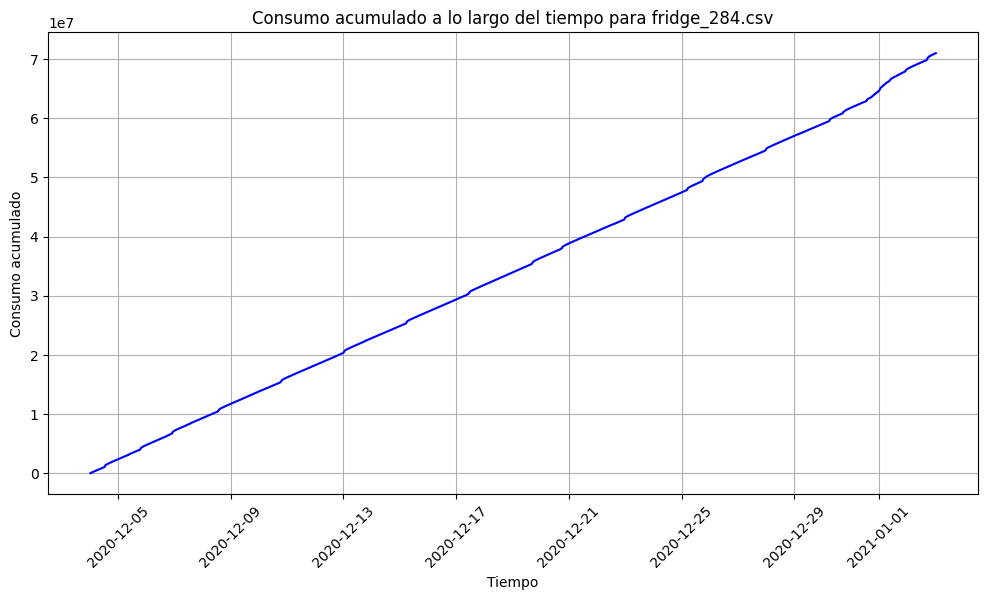

Encabezados del dataframe para coffee_97.csv:
                   timestamp  power
0  2021-03-26 20:39:53+00:00    1.0
1  2021-03-26 20:39:54+00:00    3.0
2  2021-03-26 20:39:55+00:00    3.0
3  2021-03-26 20:39:56+00:00    3.0
4  2021-03-26 20:39:57+00:00    3.0
Filas y columnas del dataframe para coffee_97.csv:
(2592001, 2)


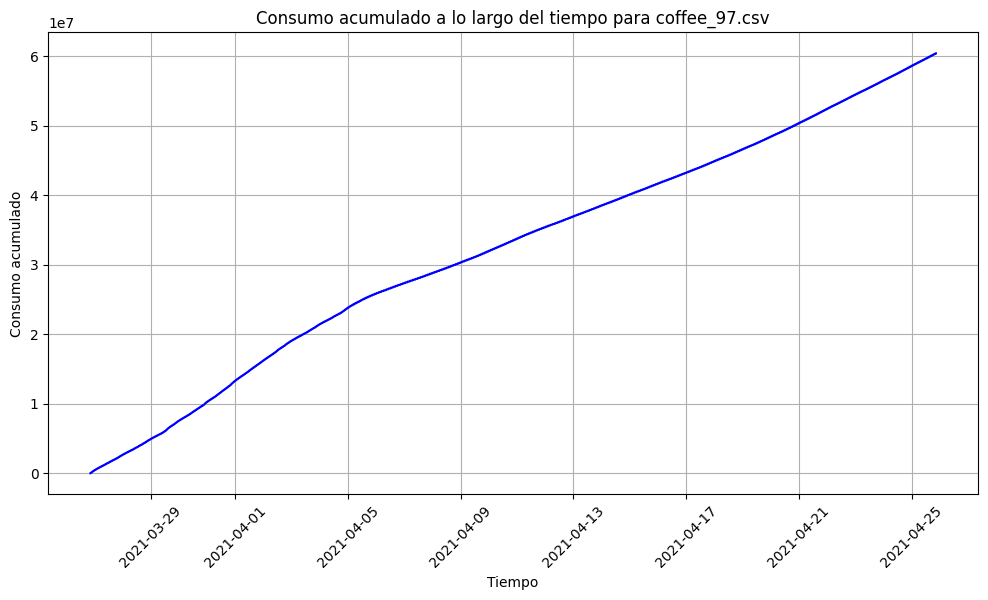

Encabezados del dataframe para fridge_98.csv:
                   timestamp  power
0  2021-08-13 00:00:00+00:00    0.0
1  2021-08-13 00:00:01+00:00    0.0
2  2021-08-13 00:00:02+00:00    0.0
3  2021-08-13 00:00:03+00:00    0.0
4  2021-08-13 00:00:04+00:00    0.0
Filas y columnas del dataframe para fridge_98.csv:
(2592000, 2)


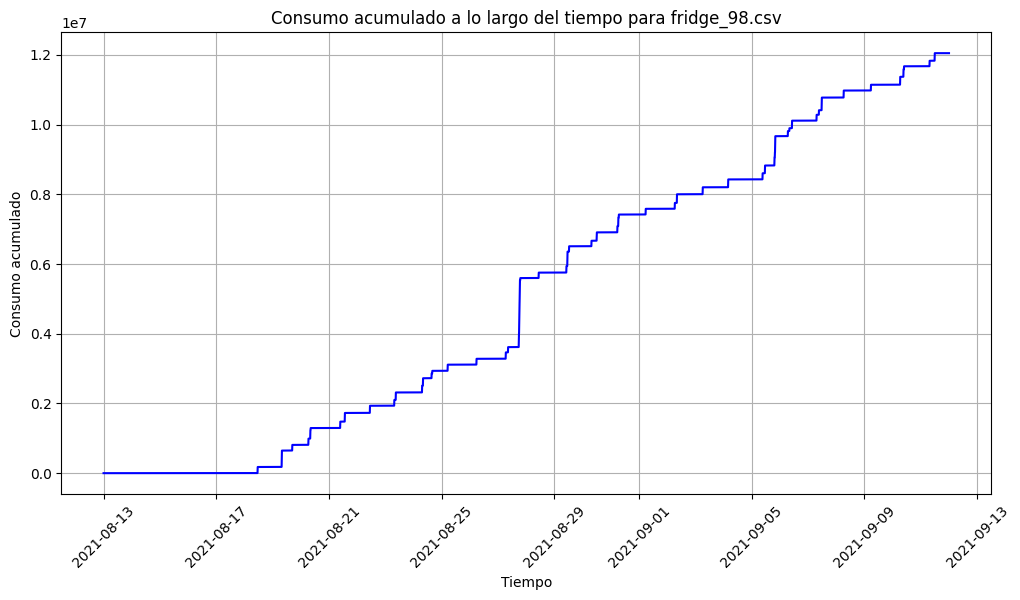

Encabezados del dataframe para washing_machine_135.csv:
                   timestamp  power
0  2021-07-02 00:00:00+00:00    1.0
1  2021-07-02 00:00:01+00:00    1.0
2  2021-07-02 00:00:02+00:00    1.0
3  2021-07-02 00:00:03+00:00    1.0
4  2021-07-02 00:00:04+00:00    1.0
Filas y columnas del dataframe para washing_machine_135.csv:
(2591999, 2)


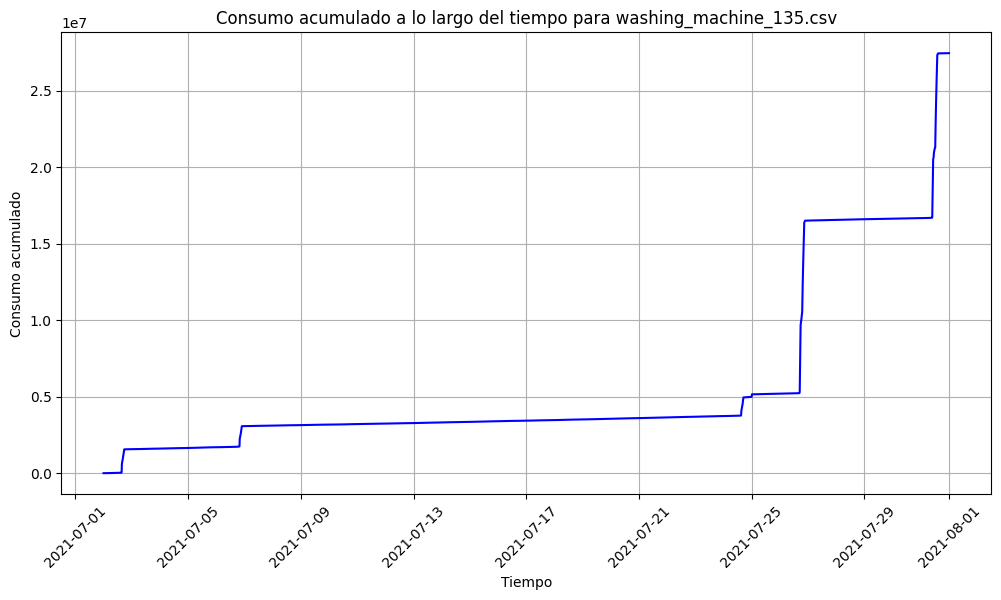

Encabezados del dataframe para internet_router_131.csv:
                   timestamp      power
0  2021-06-22 13:31:30+00:00  10.200000
1  2021-06-22 13:31:31+00:00  10.333333
2  2021-06-22 13:31:32+00:00   9.000000
3  2021-06-22 13:31:33+00:00   9.000000
4  2021-06-22 13:31:34+00:00   9.000000
Filas y columnas del dataframe para internet_router_131.csv:
(2591998, 2)


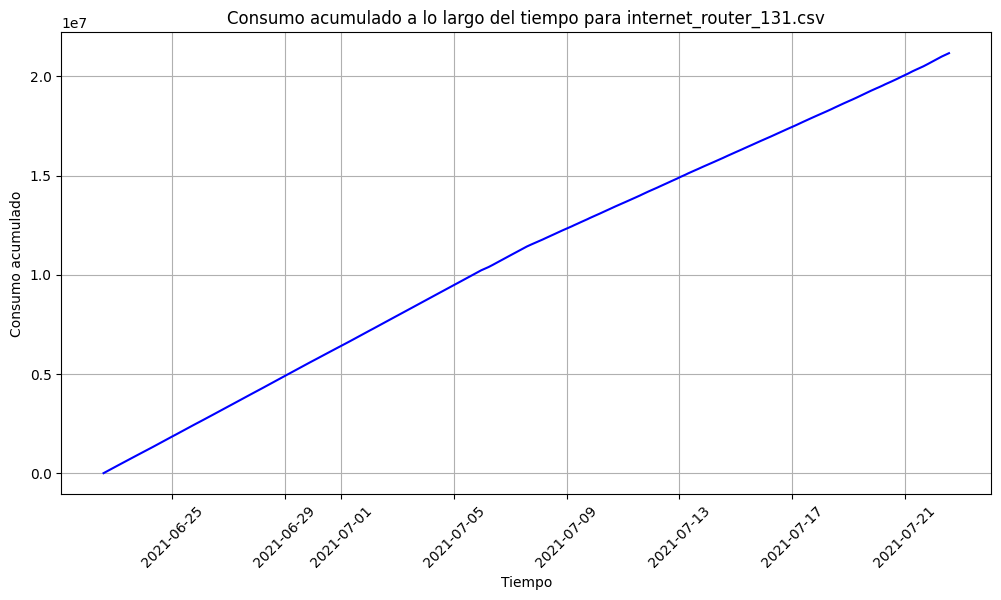

Encabezados del dataframe para dryer_219.csv:
                   timestamp  power
0  2021-02-11 00:00:00+00:00    1.0
1  2021-02-11 00:00:01+00:00    1.0
2  2021-02-11 00:00:02+00:00    1.0
3  2021-02-11 00:00:03+00:00    1.0
4  2021-02-11 00:00:04+00:00    1.0
Filas y columnas del dataframe para dryer_219.csv:
(2592000, 2)


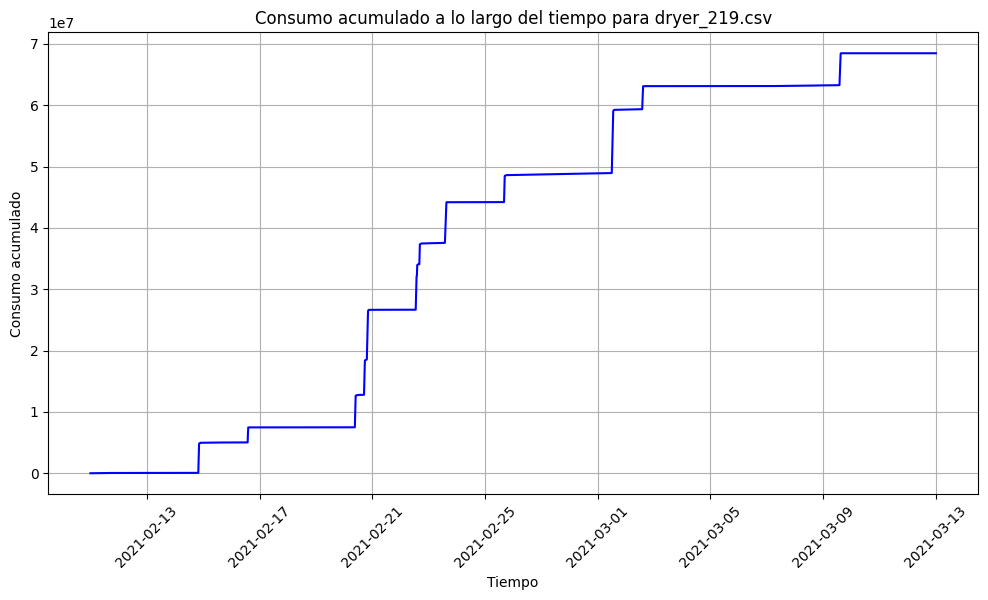

Encabezados del dataframe para boiler_217.csv:
                   timestamp  power
0  2020-09-23 22:13:53+00:00    0.0
1  2020-09-23 22:13:54+00:00    0.0
2  2020-09-23 22:13:55+00:00    0.0
3  2020-09-23 22:13:56+00:00    0.0
4  2020-09-23 22:13:57+00:00    0.0
Filas y columnas del dataframe para boiler_217.csv:
(2592001, 2)


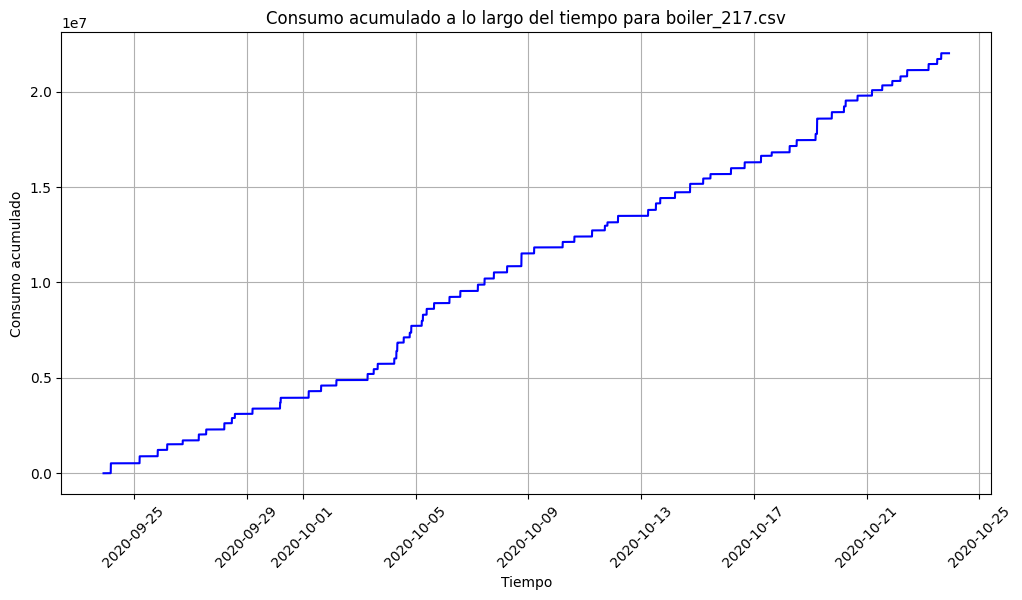

Encabezados del dataframe para washing_machine_218.csv:
                   timestamp  power
0  2021-04-03 17:57:56+00:00    0.3
1  2021-04-03 17:57:57+00:00    1.0
2  2021-04-03 17:57:58+00:00    1.0
3  2021-04-03 17:57:59+00:00    1.0
4  2021-04-03 17:58:00+00:00    1.0
Filas y columnas del dataframe para washing_machine_218.csv:
(2592000, 2)


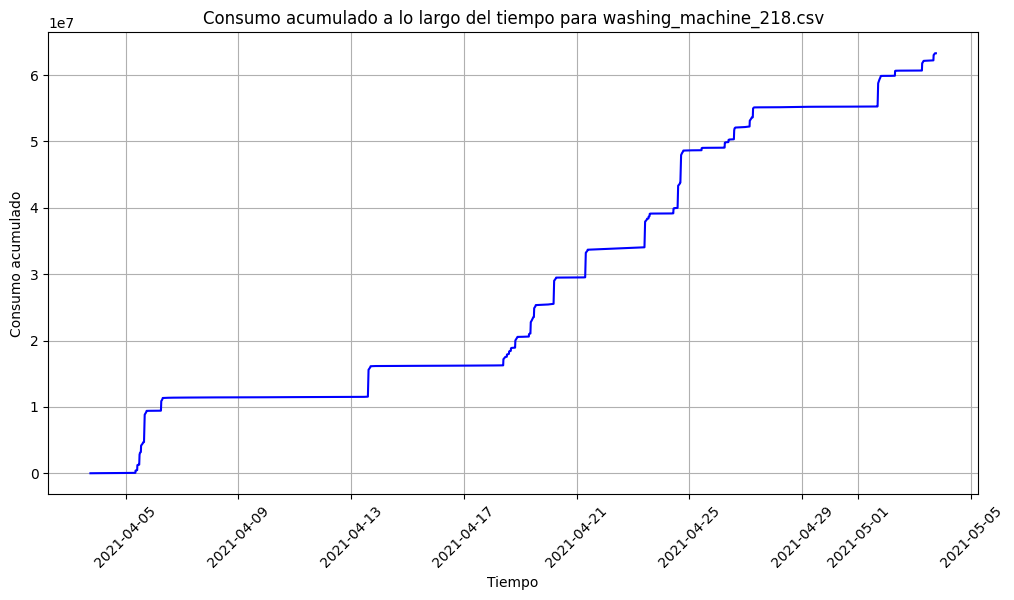

Encabezados del dataframe para freezer_249.csv:
                   timestamp  power
0  2020-10-09 13:53:49+00:00   0.00
1  2020-10-09 13:53:50+00:00   0.25
2  2020-10-09 13:53:51+00:00   1.00
3  2020-10-09 13:53:52+00:00   1.00
4  2020-10-09 13:53:53+00:00   1.00
Filas y columnas del dataframe para freezer_249.csv:
(2592000, 2)


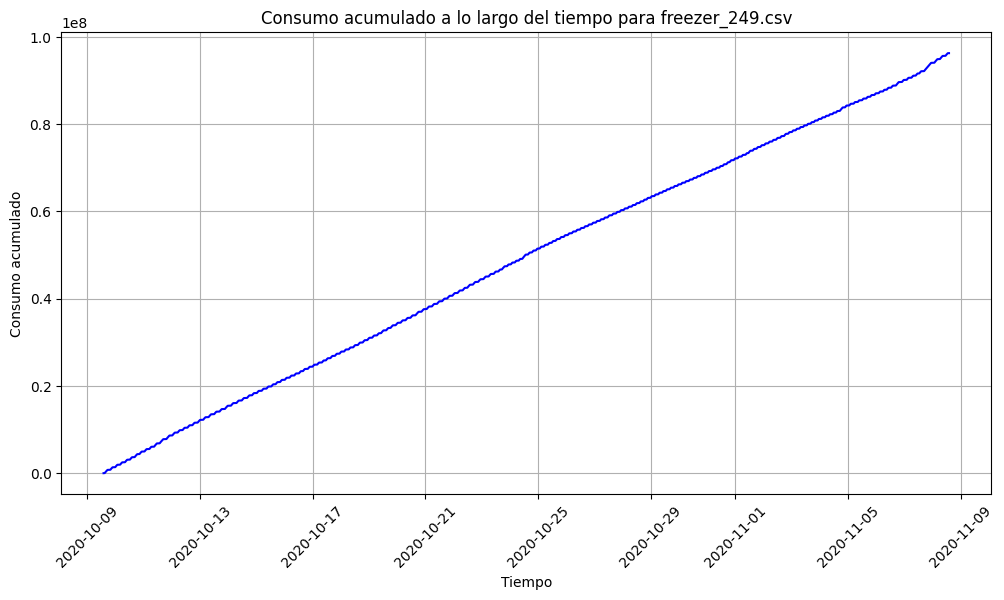

In [9]:
file_names = [
    'dishwasher_53.csv',
    'boiler_226.csv',
    'air_purifier_293.csv',
    'sound_system_252.csv',
    '3D_printer_29.csv',
    'coffee_54.csv',
    'phone_charger_282.csv',
    'fridge_207.csv',
    'radiator_309.csv',
    'dehumidifier_310.csv',
    'fridge_317.csv',
    'micro_wave_oven_314.csv',
    'laptop_289.csv',
    'tv_290.csv',
    'vacuum_236.csv',
    'screen_302.csv',
    'dehumidifier_322.csv',
    'solar_panel_325.csv',
    'screen_146.csv',
    'washing_machine_157.csv',
    'fan_215.csv',
    'air_conditioner_222.csv',
    'laptop_64.csv',
    'coffee_37.csv',
    'washing_machine_52.csv',
    'computer_44.csv',
    'boiler_233.csv',
    'micro_wave_oven_147.csv',
    'printer_286.csv',
    'fridge_284.csv',
    'coffee_97.csv',
    'fridge_98.csv',
    'washing_machine_135.csv',
    'internet_router_131.csv',
    'dryer_219.csv',
    'boiler_217.csv',
    'washing_machine_218.csv',
    'freezer_249.csv'
]

# Directorio donde se encuentran los archivos CSV
csv_directory = './archive/'

# Iterar sobre cada archivo CSV
for file_name in file_names:
    file_path = os.path.join(csv_directory, file_name)
    
    # Cargar el DataFrame desde el archivo CSV
    df = pd.read_csv(file_path)

    print(f"Encabezados del dataframe para {file_name}:")
    print(df.head())

    # Imprimiendo la cantidad de filas y columnas del dataframe.
    print(f"Filas y columnas del dataframe para {file_name}:")
    print(df.shape)

    # Cambiando el formato de la columna "timestamp" a datetime.
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    # Ordenando el dataframe por la columna "timestamp".
    df = df.sort_values(by="timestamp")

    # Eliminando filas con valores NaN (missing values)
    df = df.dropna()

    # Guardando el DataFrame limpio en el mismo archivo CSV
    df.to_csv(file_path, index=False)

    # Calculando el consumo acumulado
    df['cumulative_power'] = df['power'].cumsum()

    # Creando una gráfica del consumo acumulado a lo largo del tiempo
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['cumulative_power'], color='blue')
    plt.xlabel('Tiempo')
    plt.ylabel('Consumo acumulado')
    plt.title(f'Consumo acumulado a lo largo del tiempo para {file_name}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()